In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [2]:
# Load the dataset
default = pd.read_excel("CompData-1.xlsx")


In [3]:
# Display the first few rows of the dataset
default.head()

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00         0.462045   
1                            4.230000e+09         0.460116   
2                            8.150000e+08         0.449893   
3                            0.000000e+00         0.462731   
4                            0.000000e+00         0.463117   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                              0.000352     0.001417              0.322558   
1                              0.000716     0.000000              0.315520   
2                              0.000496     0.000000              0.299851   
3                              0.000592     0.009313              0.319834   
4                              0.000782     0.400243              0.325104   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                0.194472   
1                                0.161633   
2                                0.172554   
3                                0.174738   
4                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.022074  ...              0.310901   
1                                  0.021902  ...              0.314572   
2                                  0.022186  ...              0.314777   
3                                  0.027638  ...              0.316974   
4                                  0.022072  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 58 columns]

In [4]:
# Check the number of rows and columns in the dataset
print("Number of rows (observations):", default.shape[0])
print("Number of columns (variables):", default.shape[1])


Number of rows (observations): 2058
Number of columns (variables): 58


In [5]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [6]:
# Check for duplicates
num_duplicates = default.duplicated().sum()

# Print the number of duplicates
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


In [7]:
default.describe()

Co_Code  _Operating_Expense_Rate  \
count   2058.000000             2.058000e+03   
mean   17572.113217             2.052389e+09   
std    21892.886518             3.252624e+09   
min        4.000000             1.000260e-04   
25%     3674.000000             1.578727e-04   
50%     6240.000000             3.330330e-04   
75%    24280.750000             4.110000e+09   
max    72493.000000             9.980000e+09   

       _Research_and_development_expense_rate  _Cash_flow_rate  \
count                            2.058000e+03      2058.000000   
mean                             1.208634e+09         0.465243   
std                              2.144568e+09         0.022663   
min                              0.000000e+00         0.000000   
25%                              0.000000e+00         0.460099   
50%                              1.994130e-04         0.463445   
75%                              1.550000e+09         0.468069   
max                              9.980000e+09         1.000000   

       _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
count                          2.058000e+03  2058.000000   
mean                           1.113022e+07     0.114777   
std                            9.042595e+07     0.152446   
min                            0.000000e+00     0.000000   
25%                            2.760280e-04     0.000000   
50%                            4.540450e-04     0.037099   
75%                            6.630660e-04     0.216191   
max                            9.900000e+08     0.999696   

       _Cash_Flow_Per_Share  _Per_Share_Net_profit_before_tax_Yuan_  \
count           1891.000000                             2058.000000   
mean               0.319986                                0.176967   
std                0.015300                                0.030157   
min                0.169449                                0.000000   
25%                0.314989                                0.166604   
50%                0.320648                                0.175642   
75%                0.325918                                0.185885   
max                0.462227                                0.792348   

       _Realized_Sales_Gross_Profit_Growth_Rate  \
count                               2058.000000   
mean                                   0.022761   
std                                    0.021701   
min                                    0.004282   
25%                                    0.022058   
50%                                    0.022100   
75%                                    0.022152   
max                                    1.000000   

       _Operating_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
count                    2058.000000  ...           2058.000000   
mean                        0.848108  ...              0.314629   
std                         0.004589  ...              0.012780   
min                         0.736430  ...              0.000000   
25%                         0.847974  ...              0.312783   
50%                         0.848039  ...              0.314642   
75%                         0.848115  ...              0.316546   
max                         1.000000  ...              0.569231   

       _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
count                           2044.000000             2058.000000   
mean                               0.039352                0.003401   
std                                0.047978                0.058236   
min                                0.000000                0.000000   
25%                                0.021775                0.000000   
50%                                0.032652                0.000000   
75%                                0.043947                0.000000   
max                                1.000000                1.000000   

       _Total_assets_to_GNP_price  _No_credit_Interval  \
count                2.058000e+03        

In [8]:
default["Default"].value_counts()

Default
0    1838
1     220
Name: count, dtype: int64

In [9]:
default.Default.sum() / len(default.Default)

0.10689990281827016

Check for missing values

In [10]:
default.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [11]:
# Importing pandas
import pandas as pd

# Impute missing values with mode for specific columns
columns_to_impute = ["_Cash_Flow_Per_Share", "_Total_debt_to_Total_net_worth", "_Cash_to_Total_Assets", "_Current_Liability_to_Current_Assets"]
for column in columns_to_impute:
    mode_value = default[column].mode()[0]
    default[column].fillna(mode_value, inplace=True)


In [12]:
# Check if there are any remaining missing values
print(default.isnull().sum())


Co_Code                                              0
Co_Name                                              0
_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_

<Axes: >

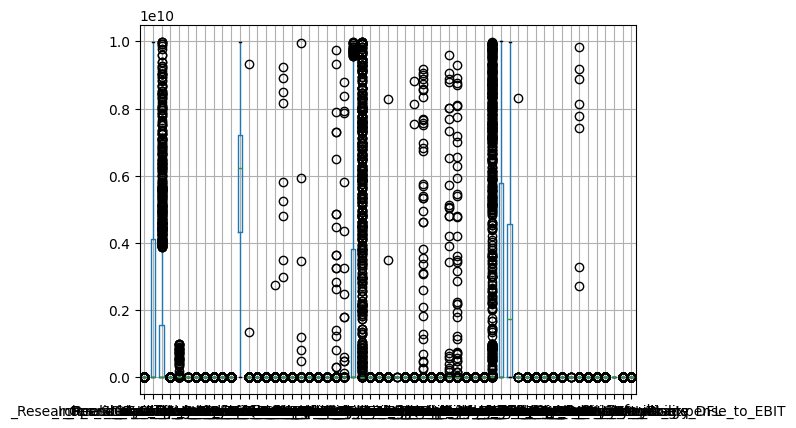

In [13]:
default.boxplot()

In [18]:
Default_X = default.drop('Default', axis = 1)
Default_Y = default['Default']

In [24]:
default = pd.concat([Default_X, Default_Y], axis = 1)

<Figure size 2000x2000 with 0 Axes>

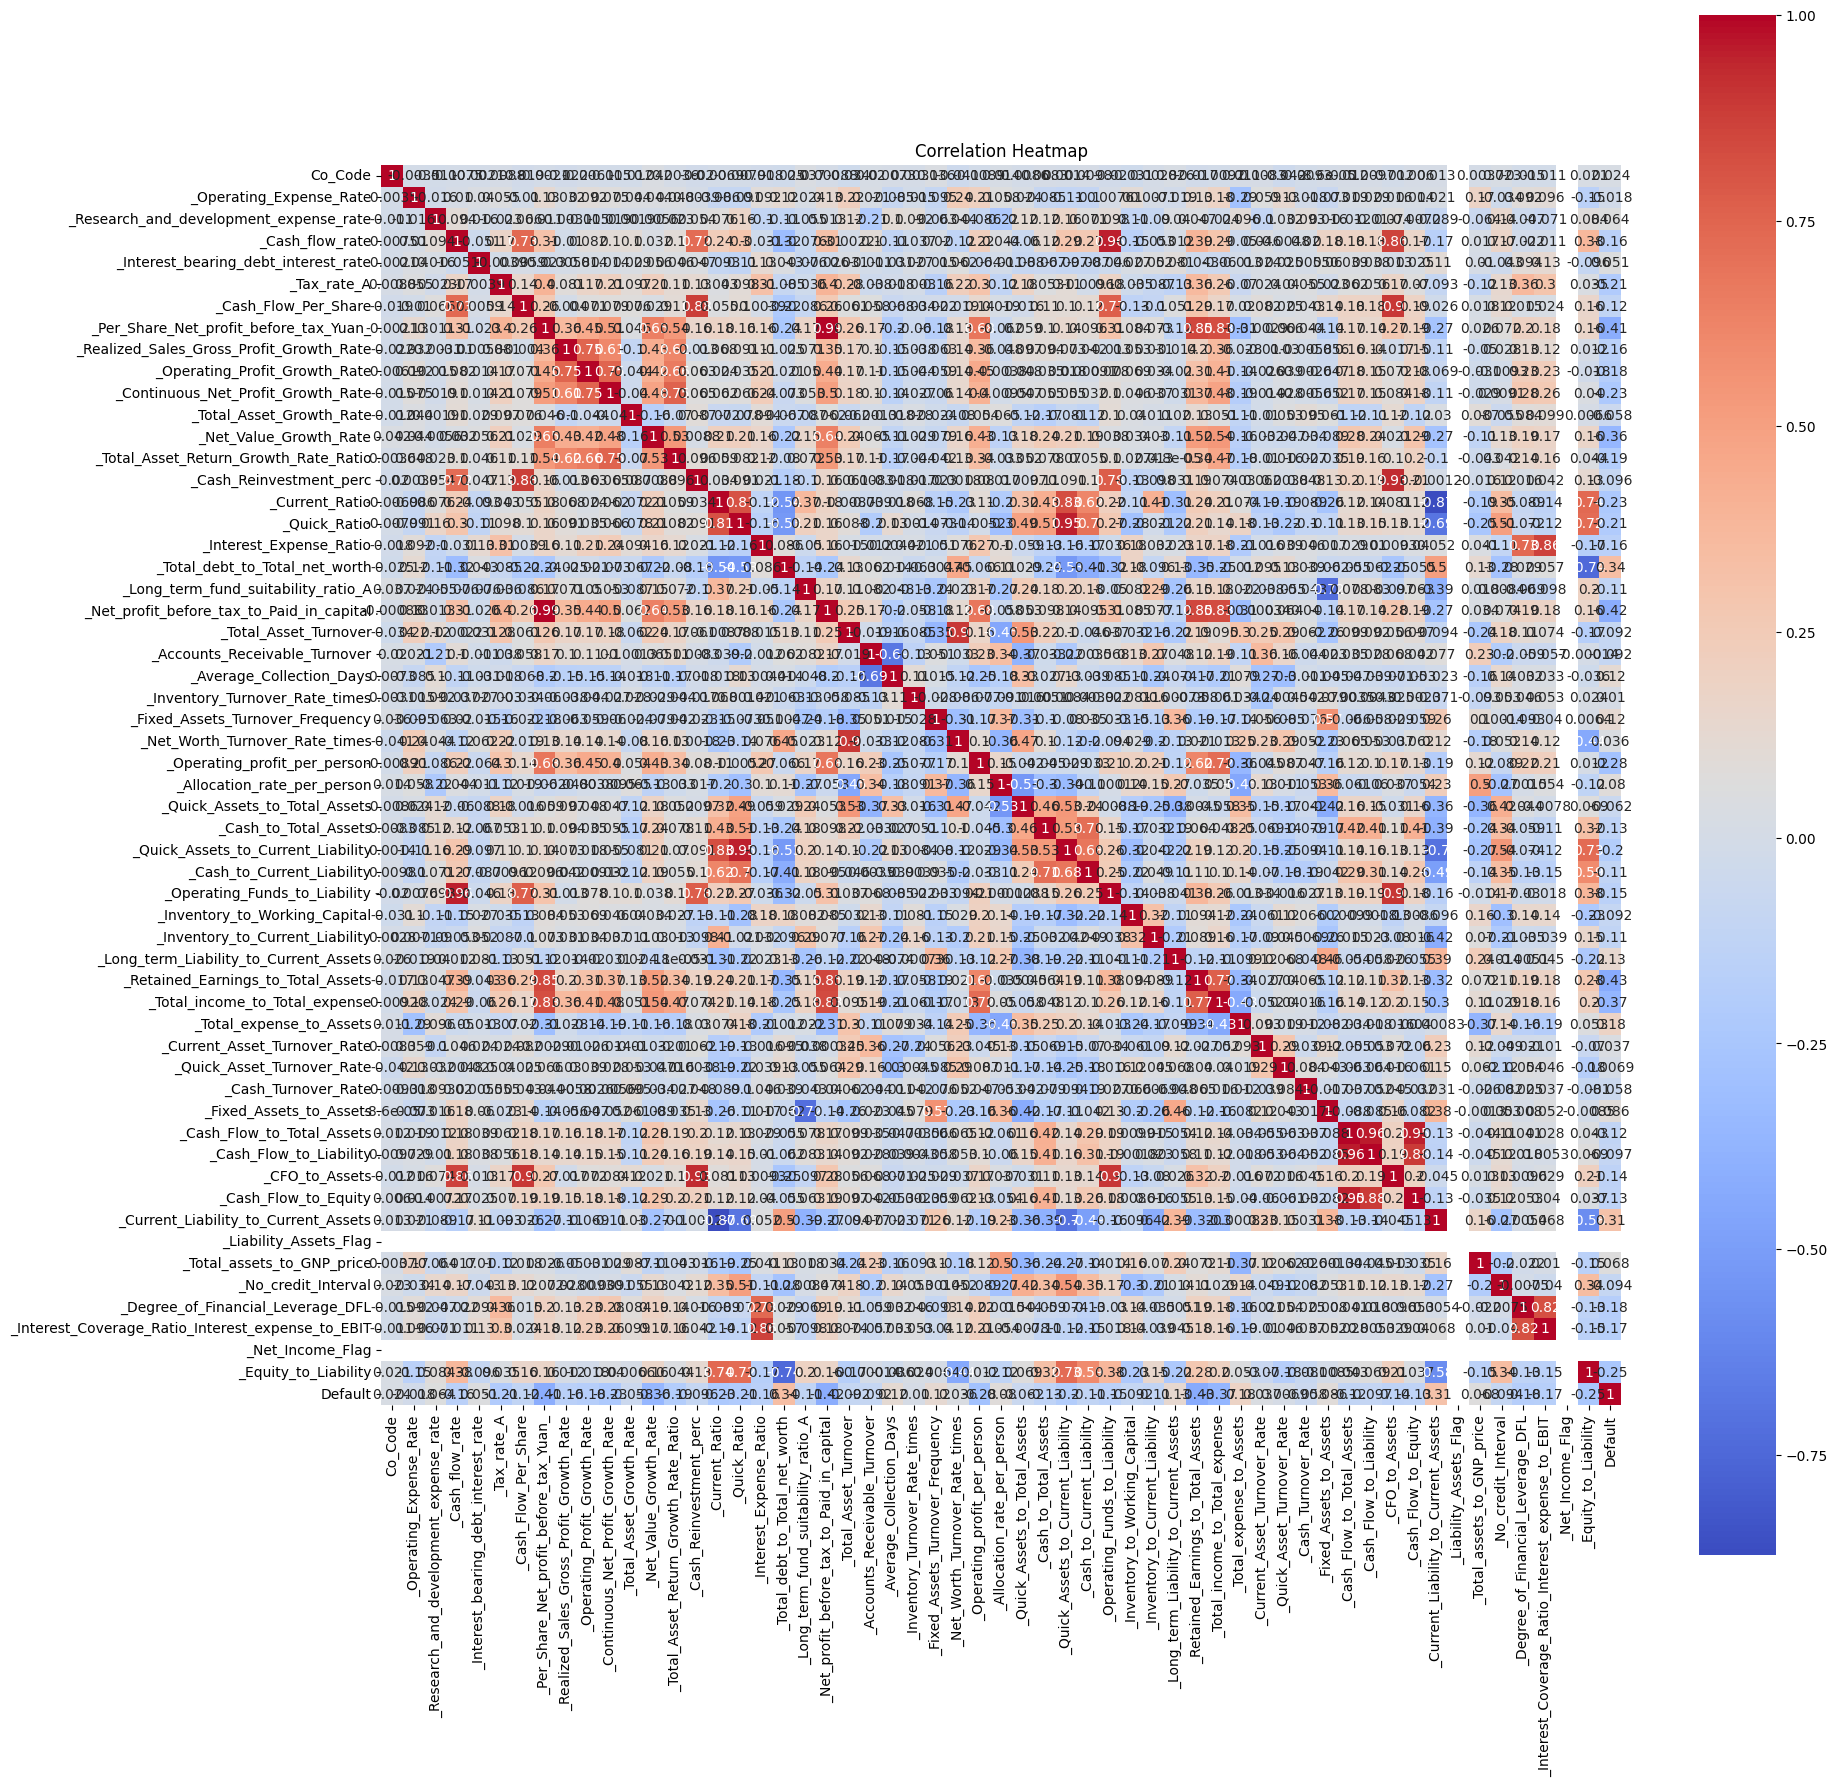

In [26]:
# Select numeric columns
numeric_columns = default.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = default[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


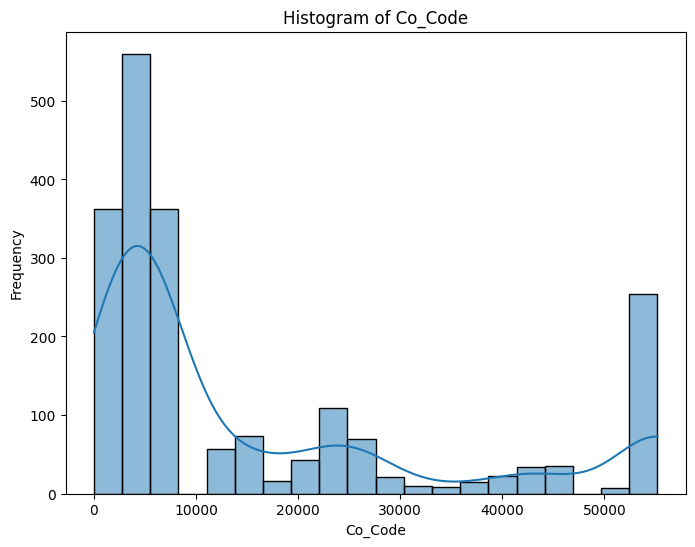

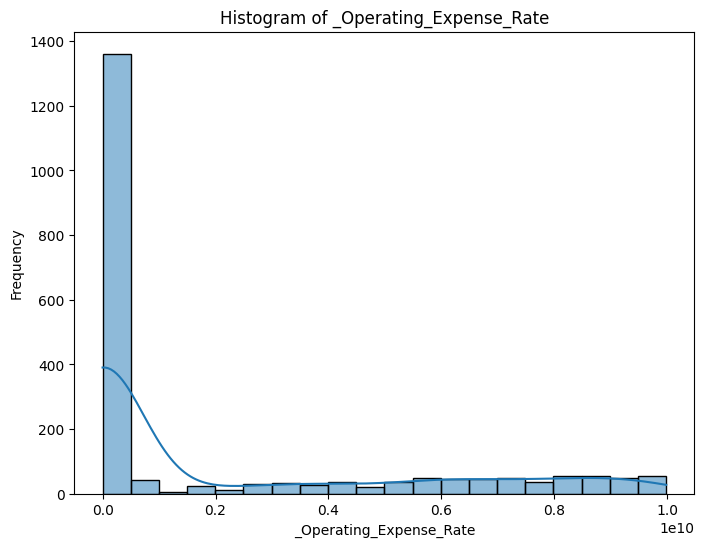

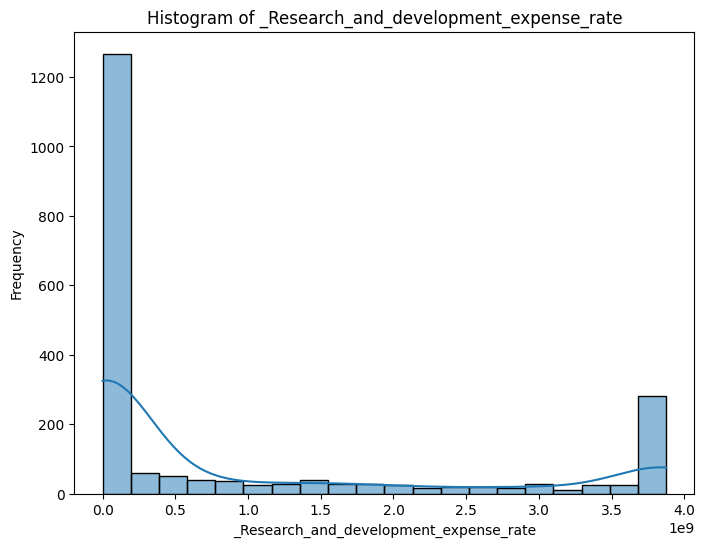

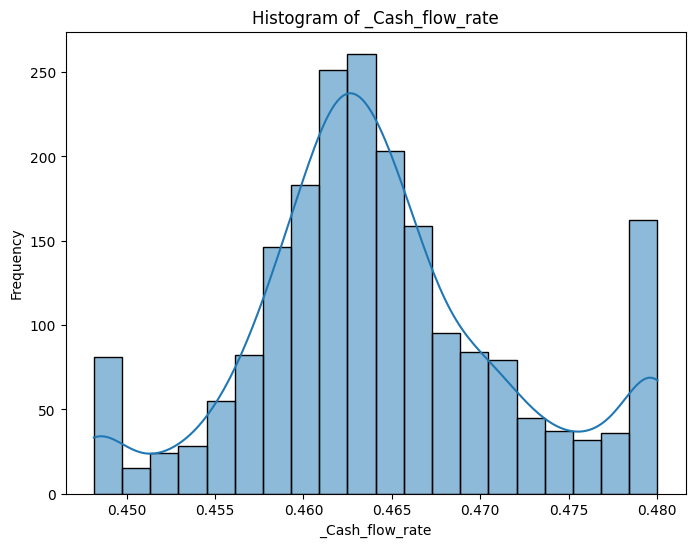

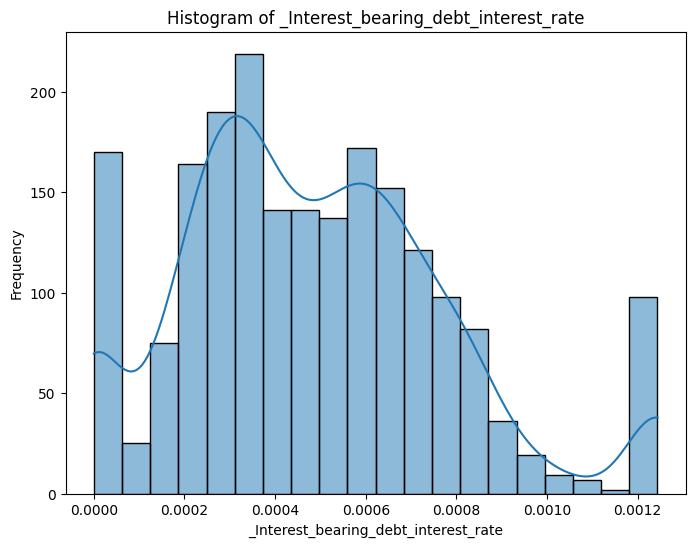

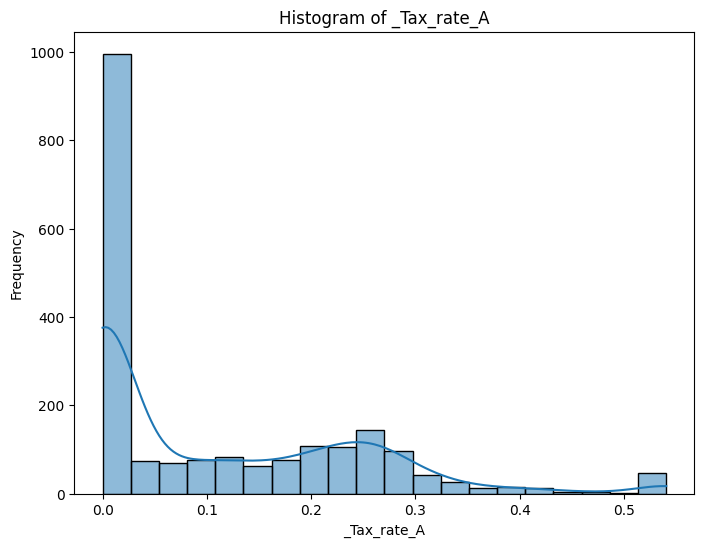

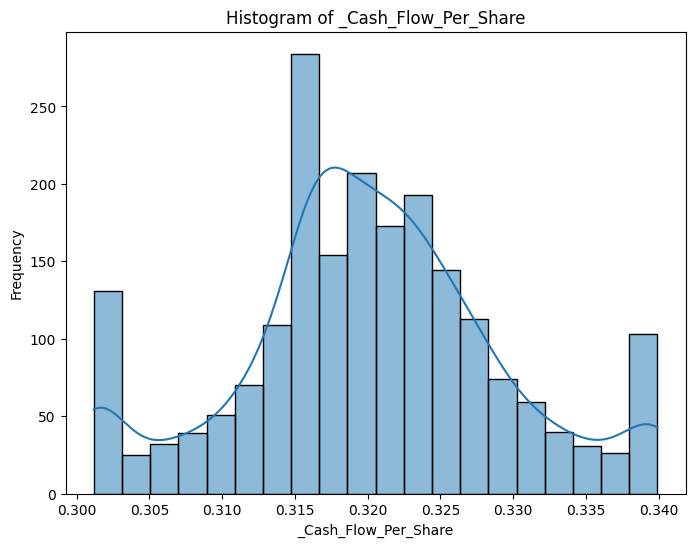

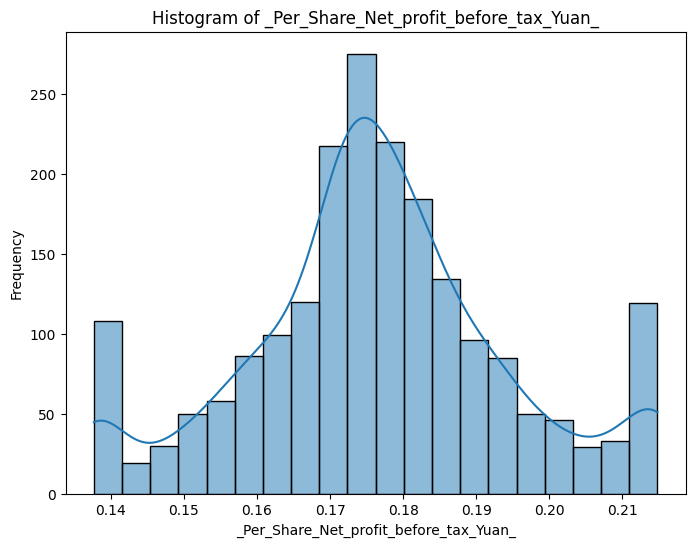

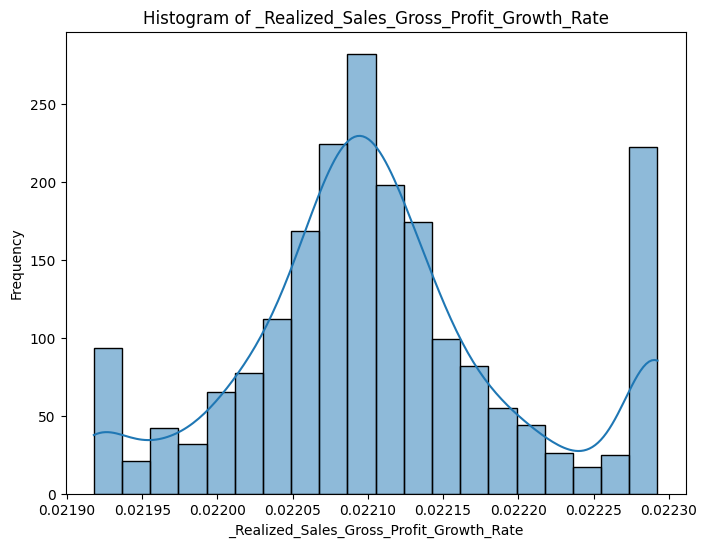

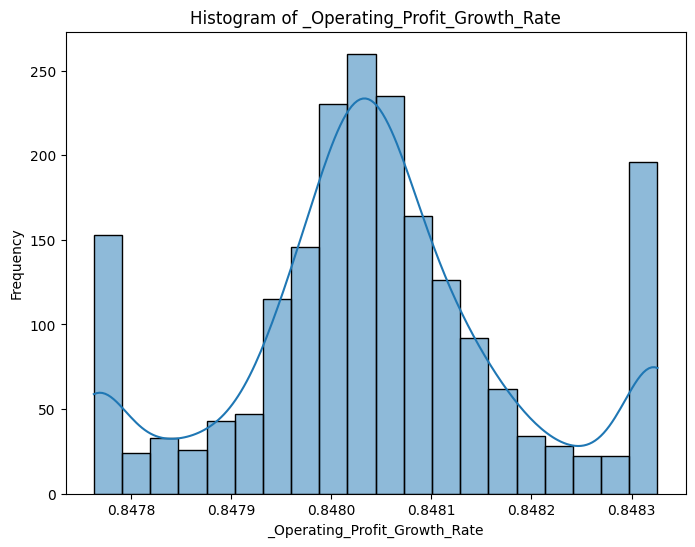

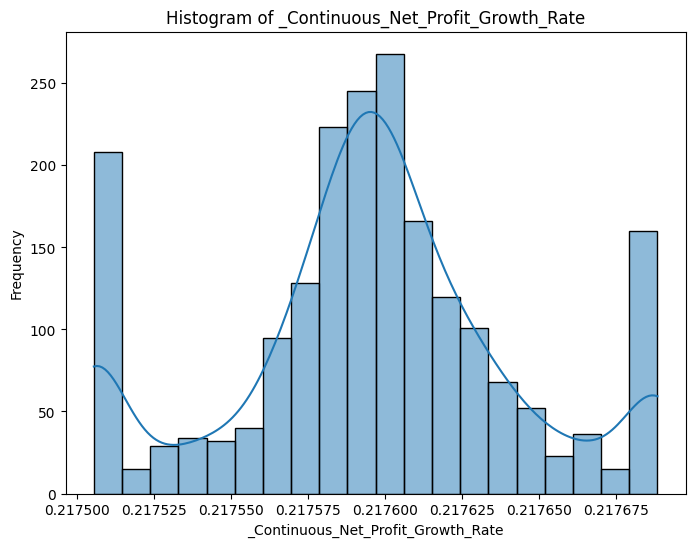

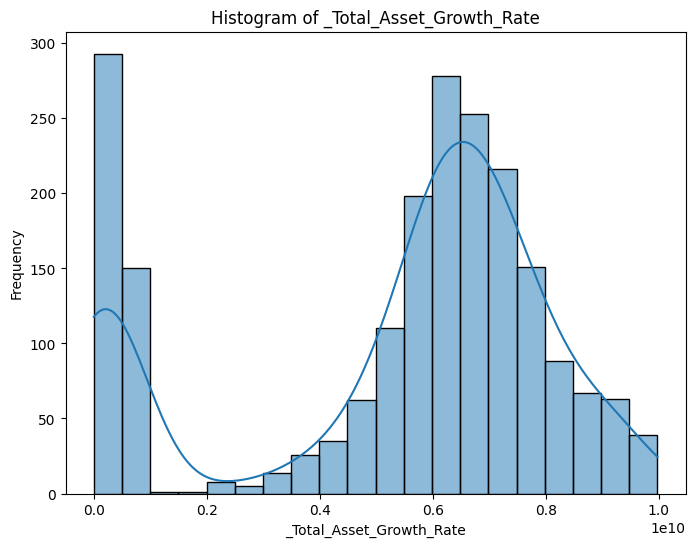

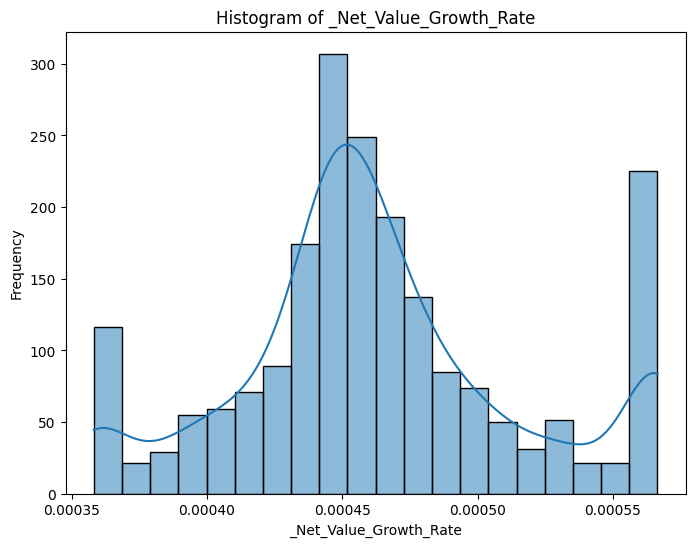

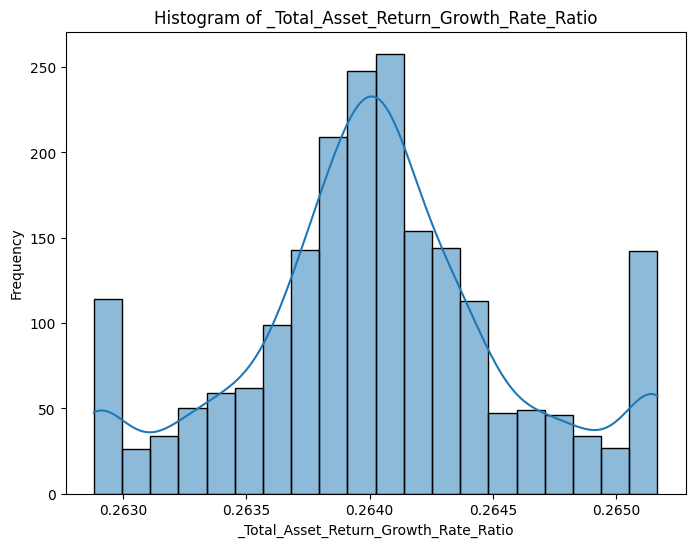

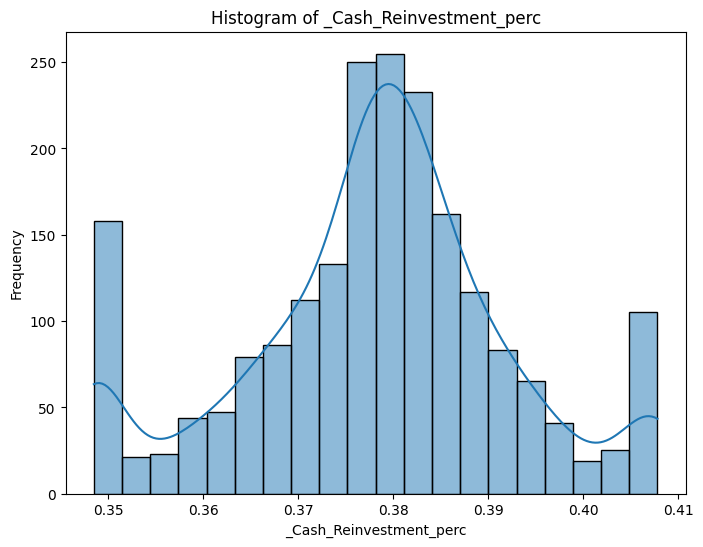

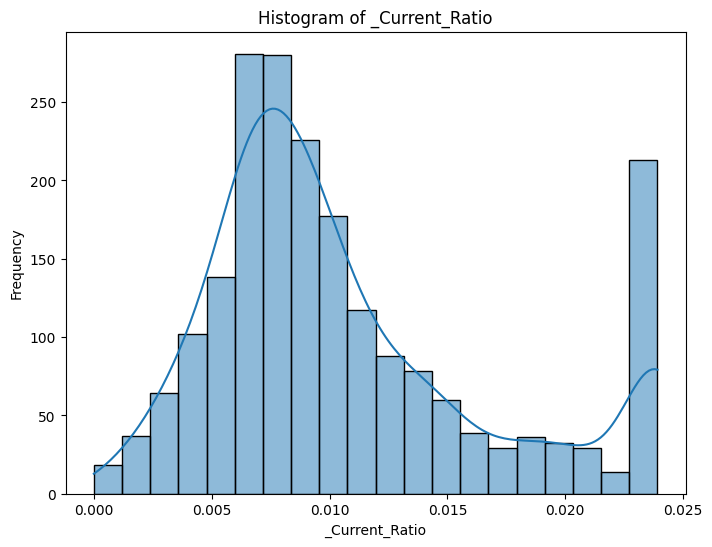

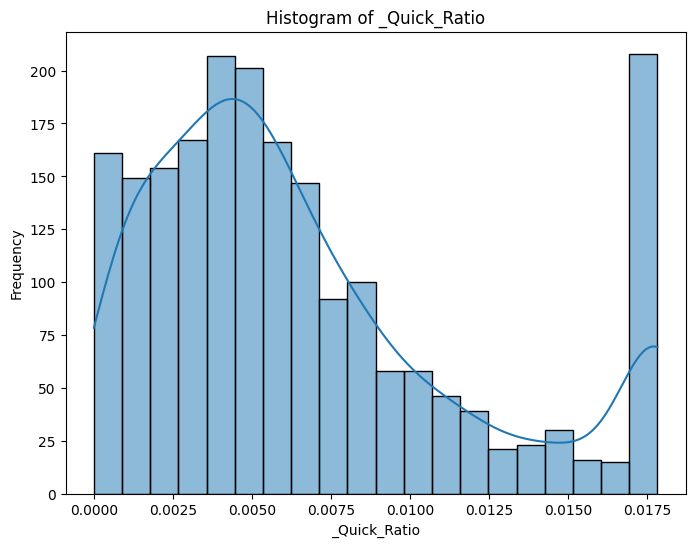

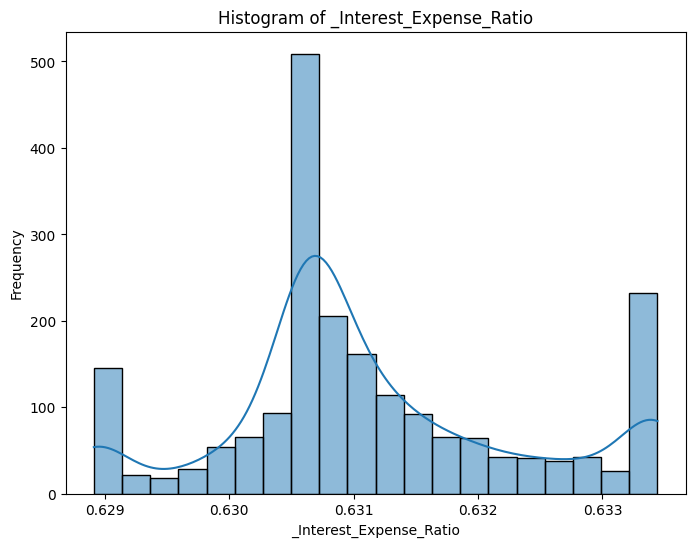

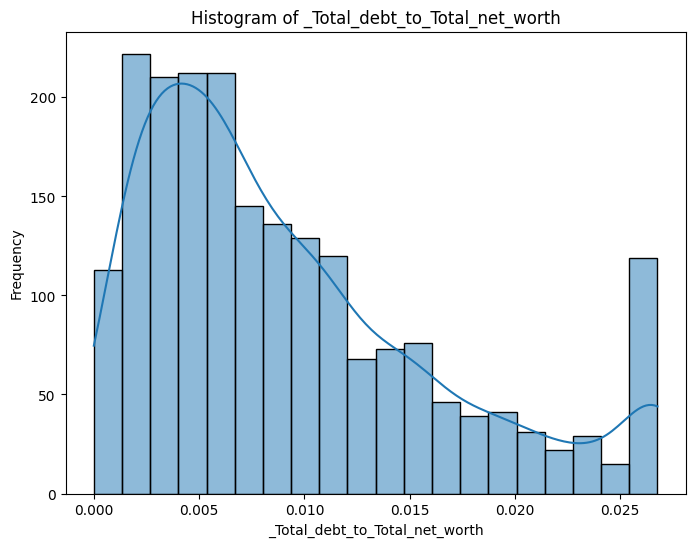

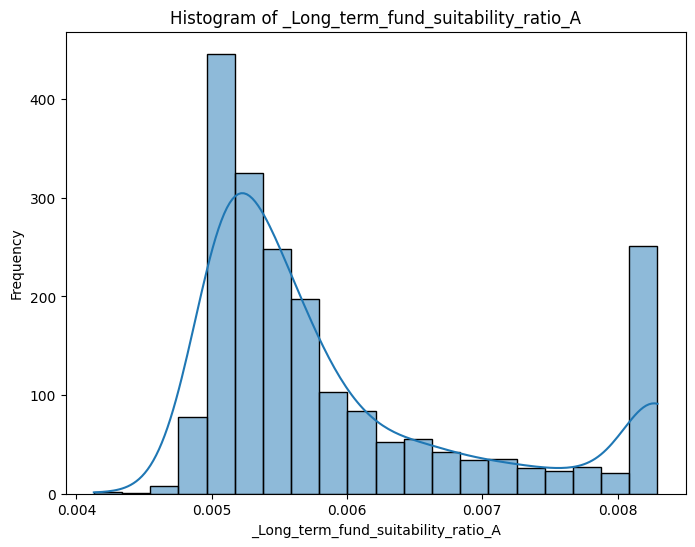

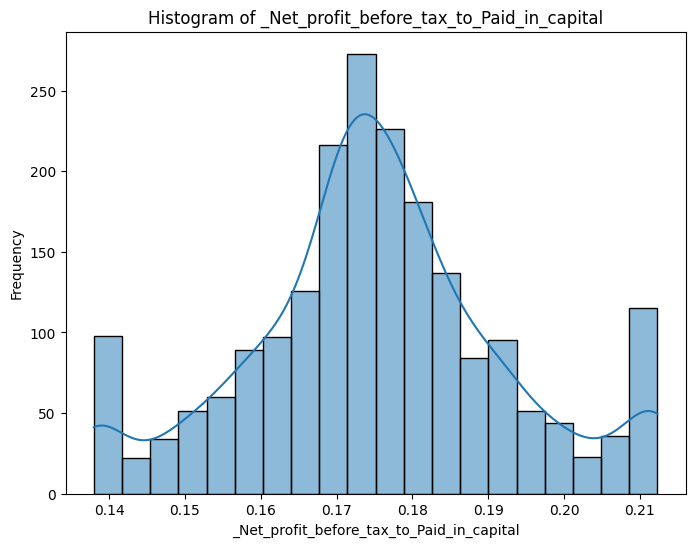

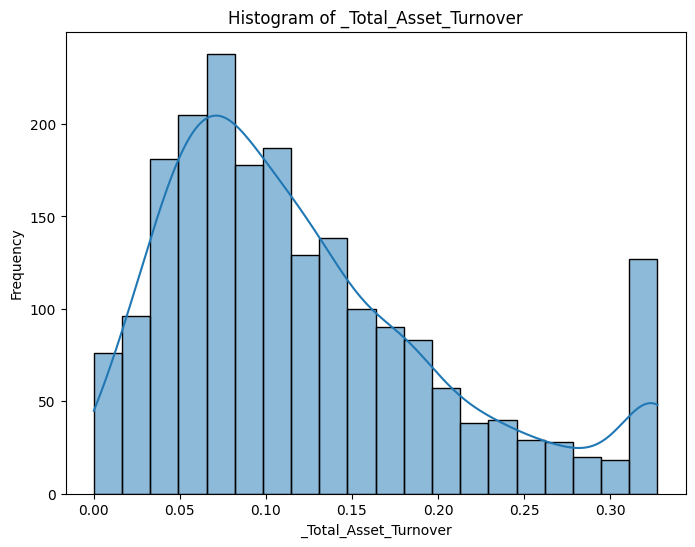

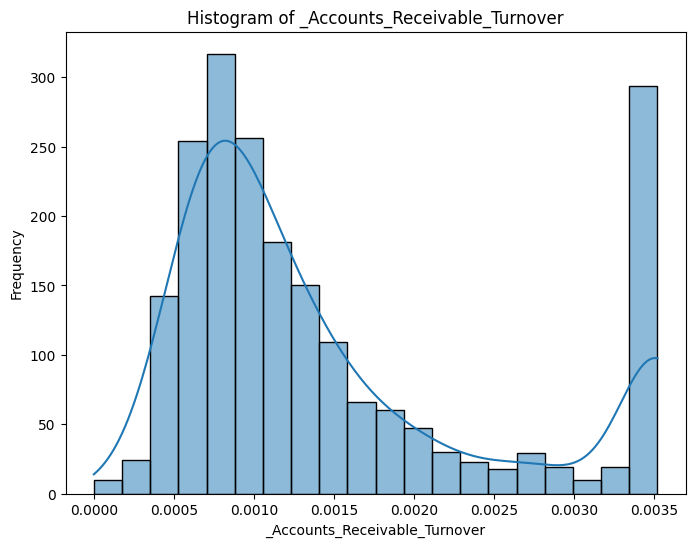

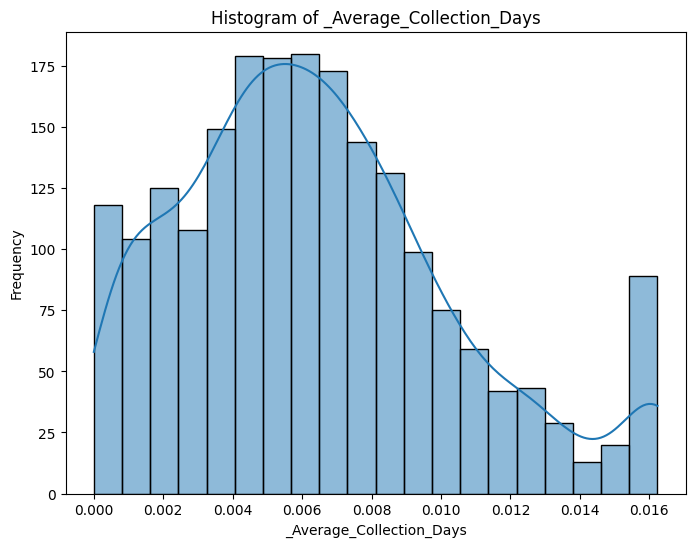

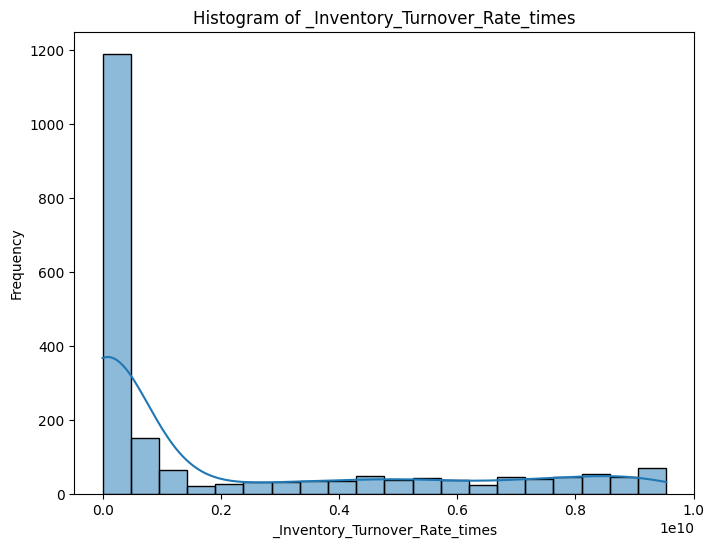

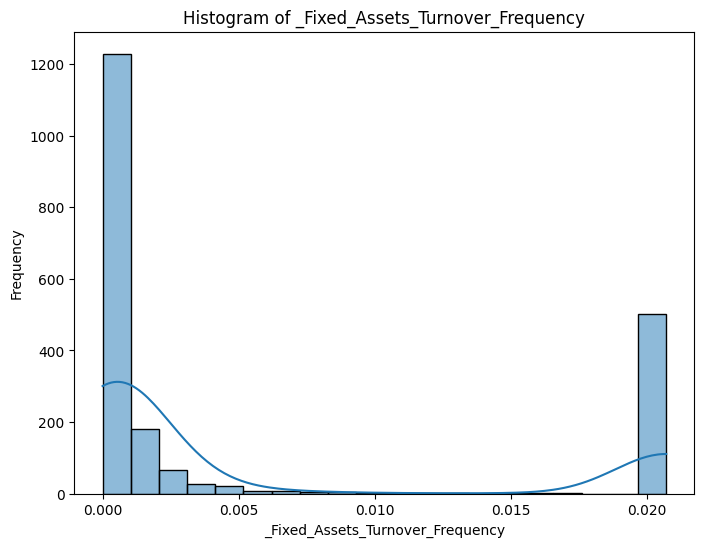

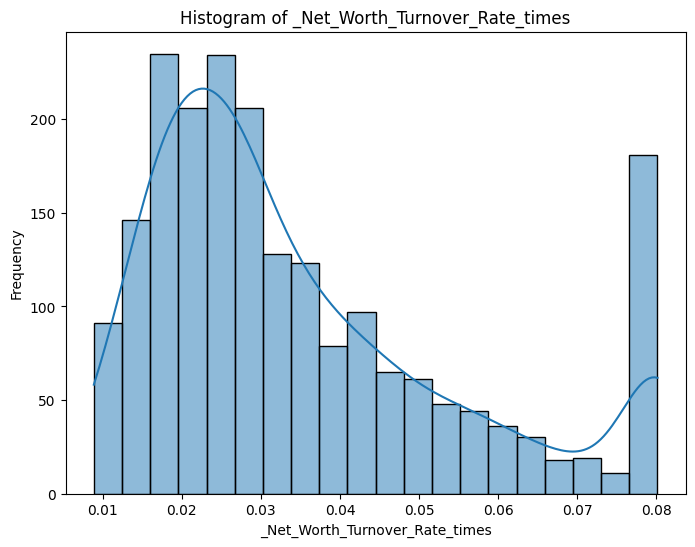

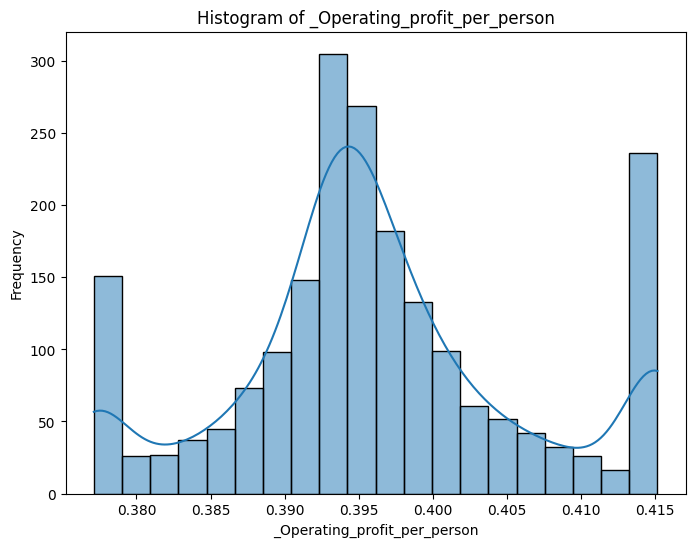

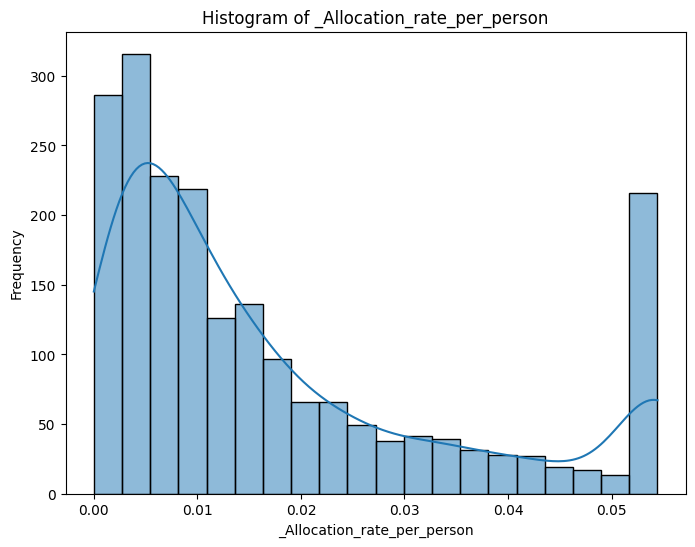

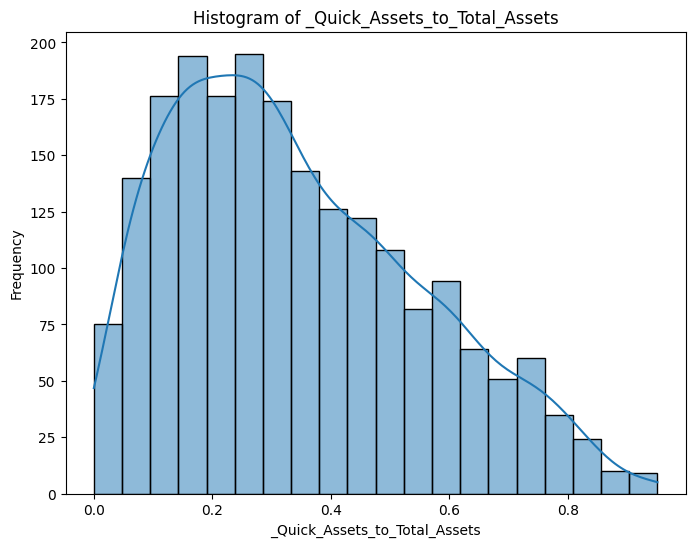

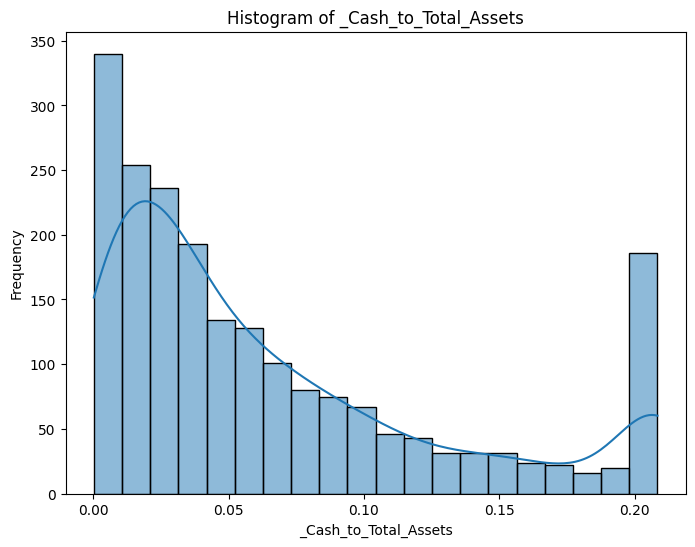

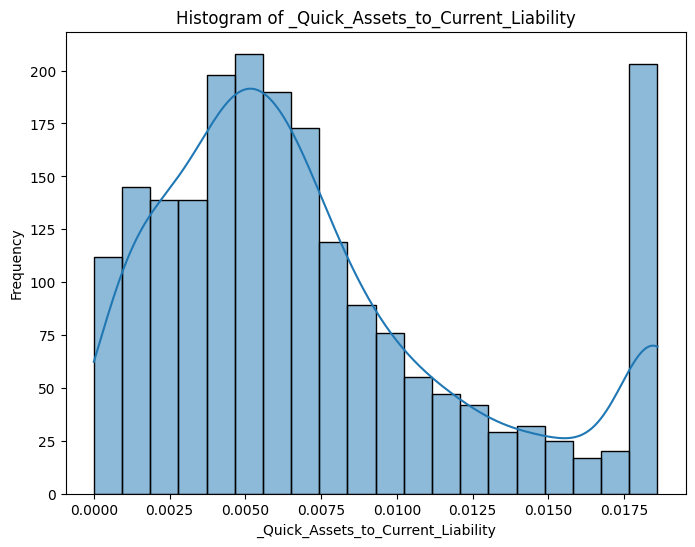

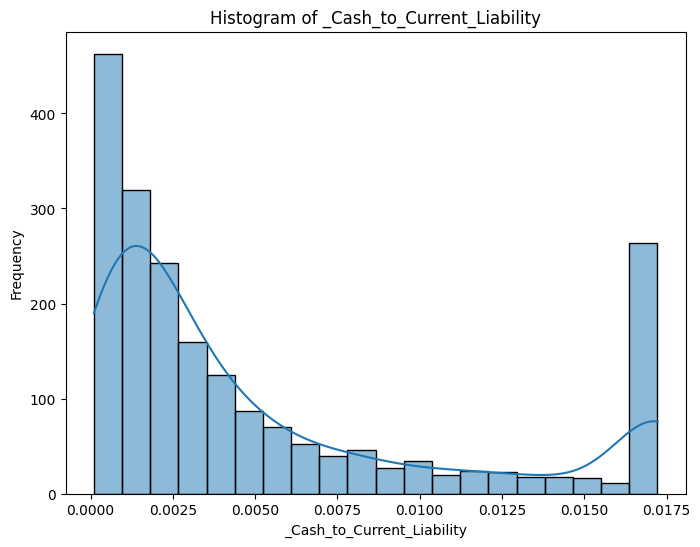

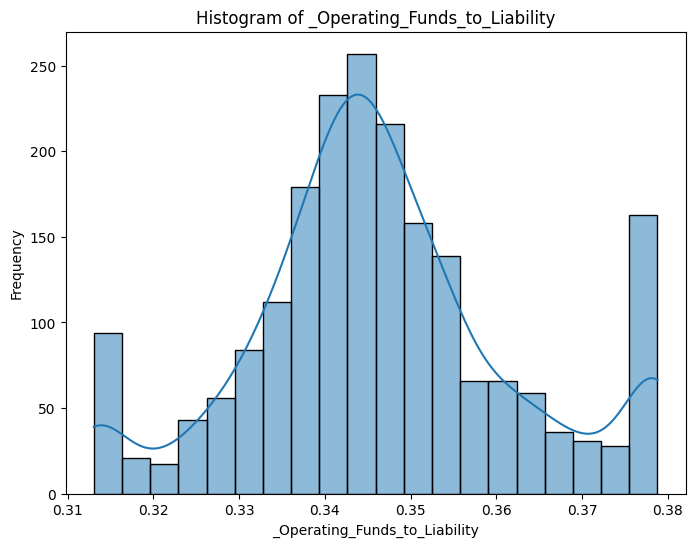

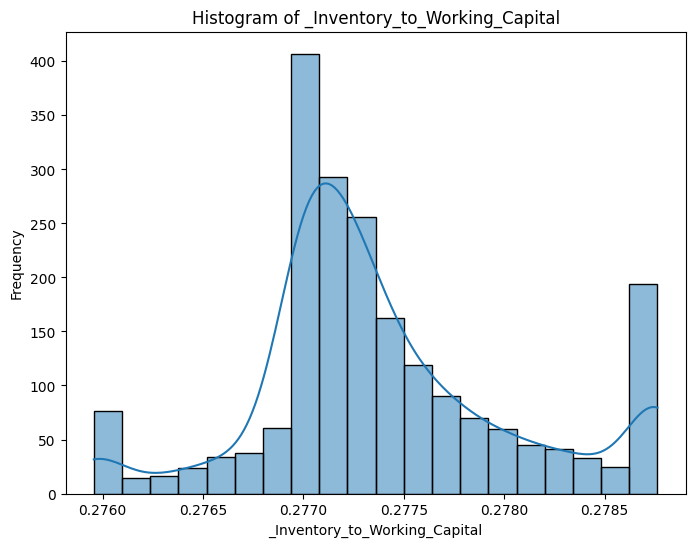

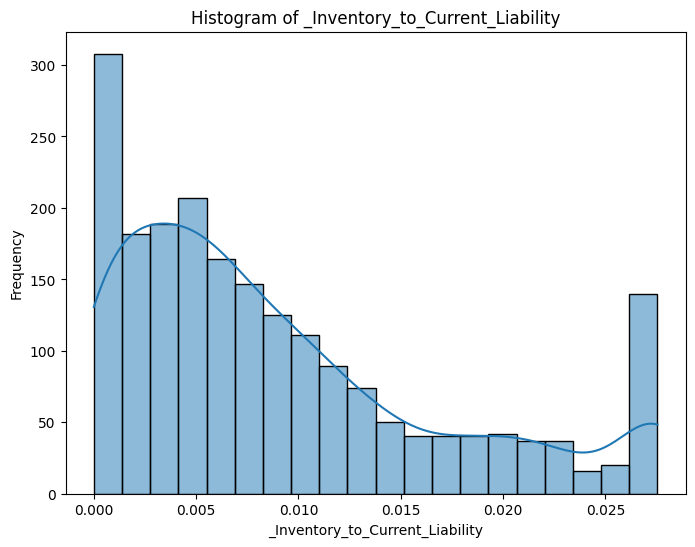

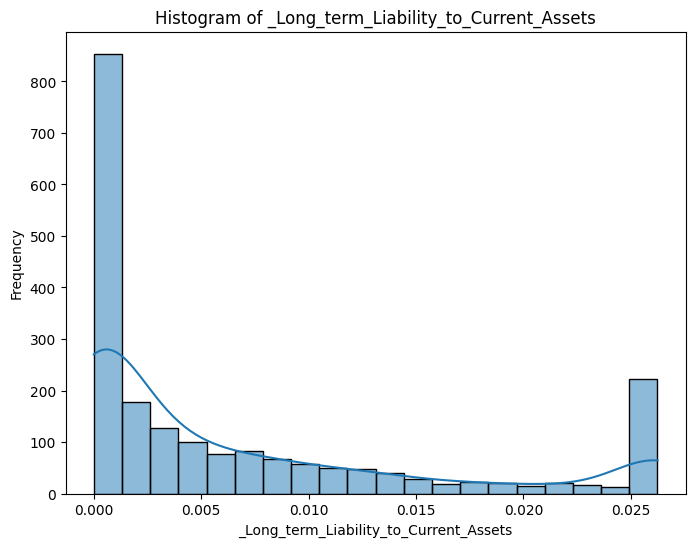

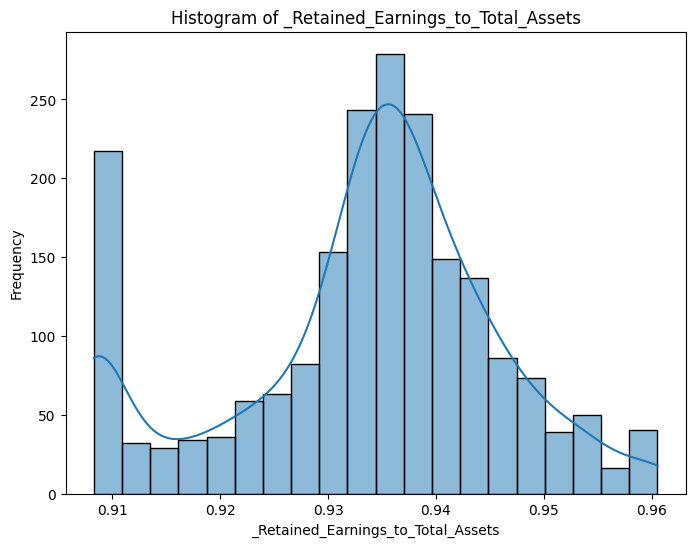

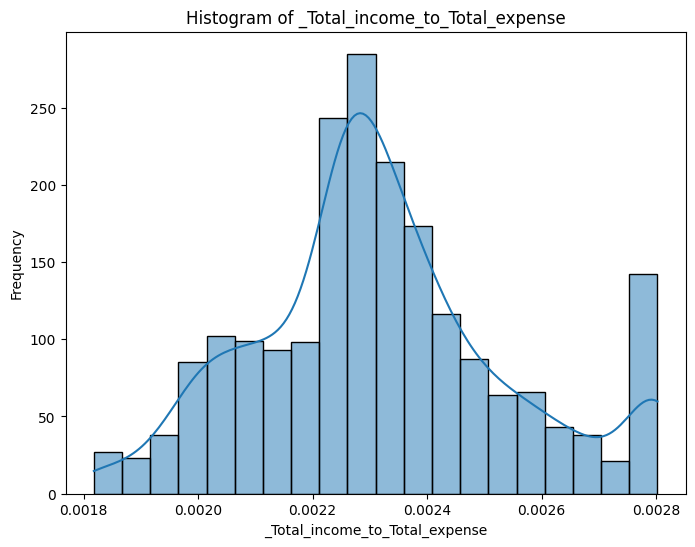

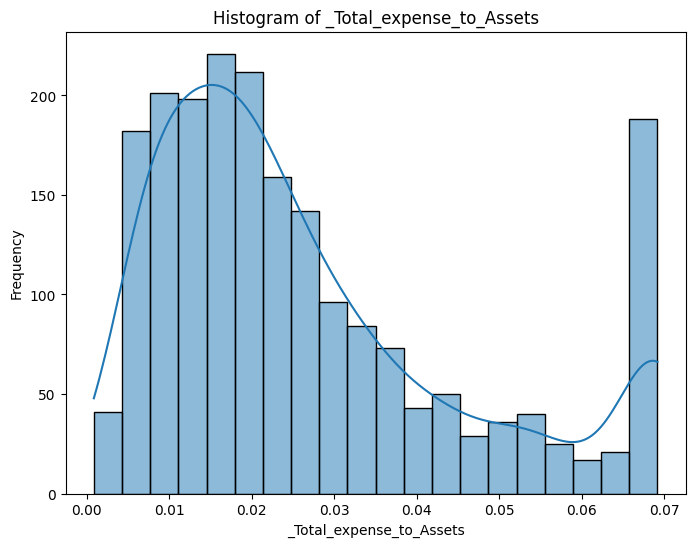

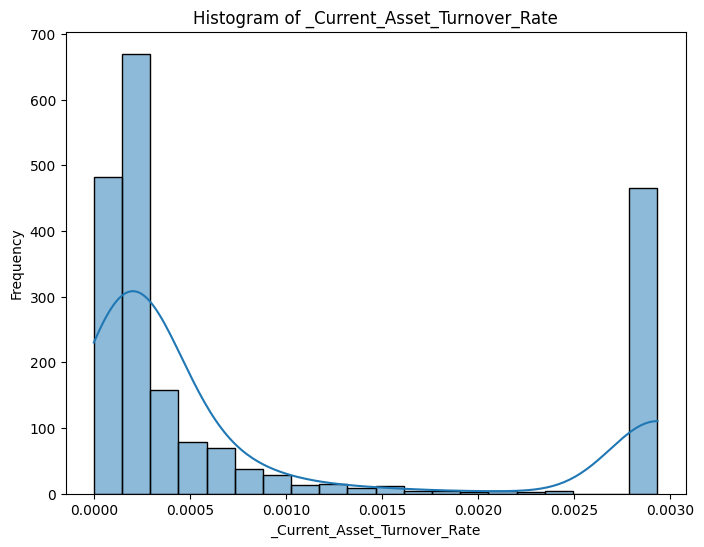

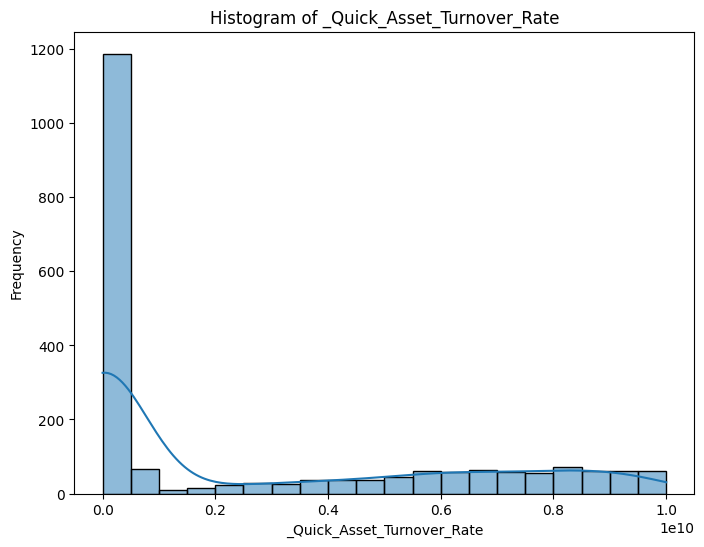

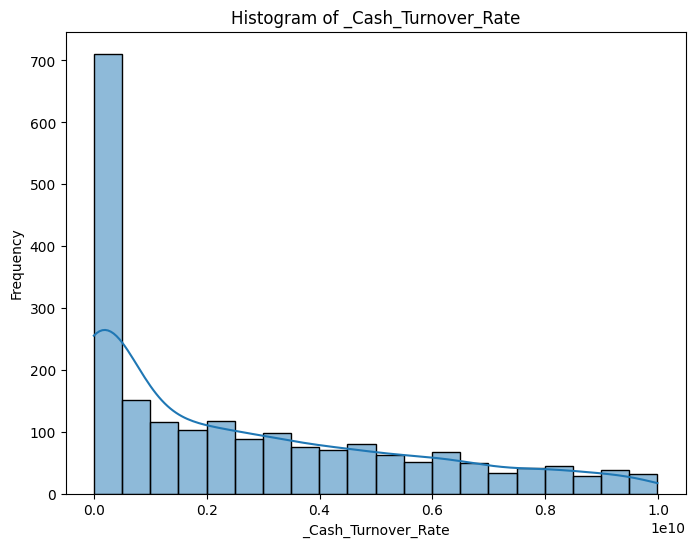

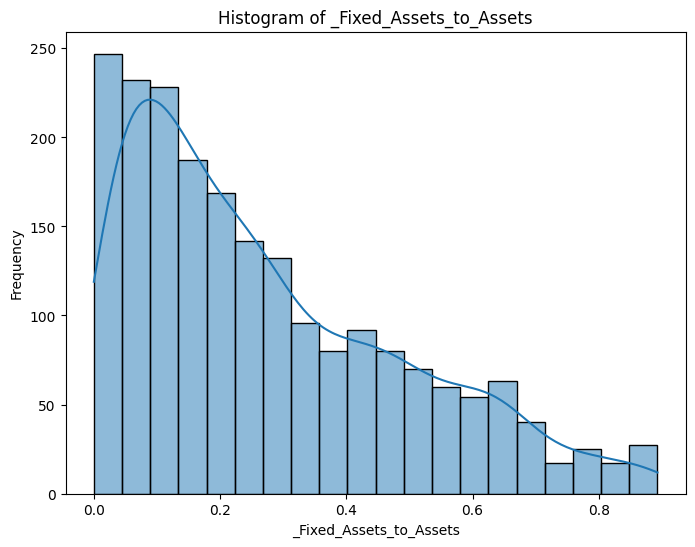

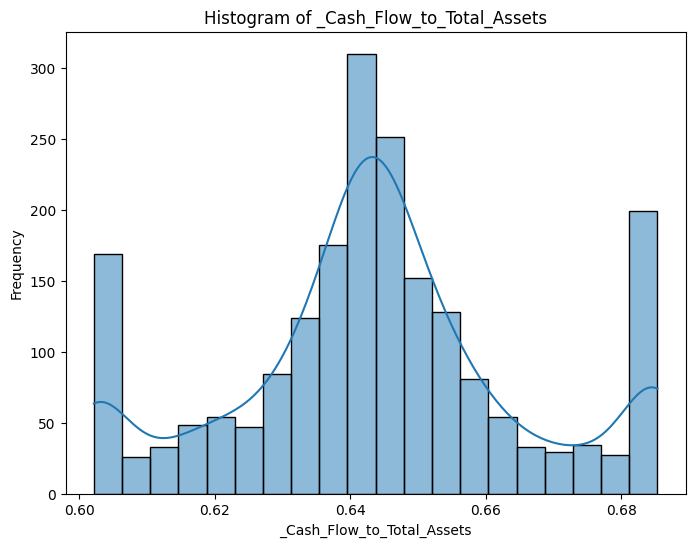

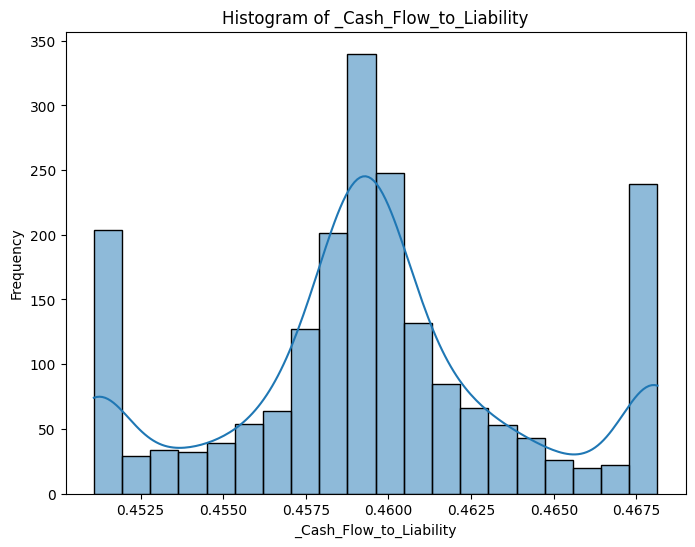

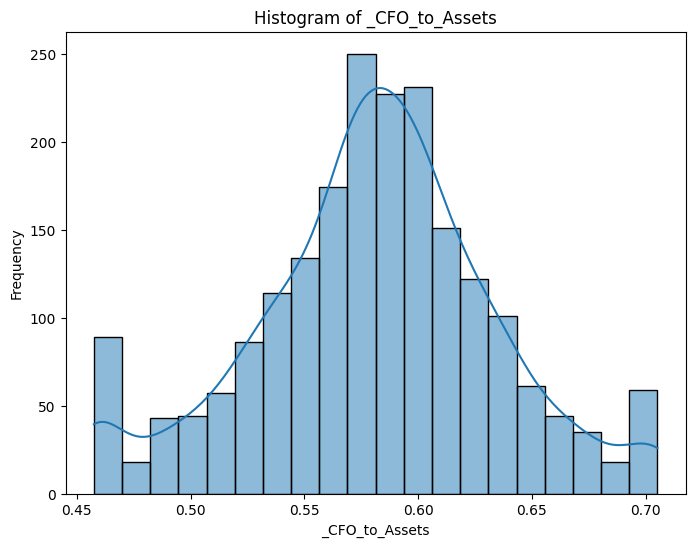

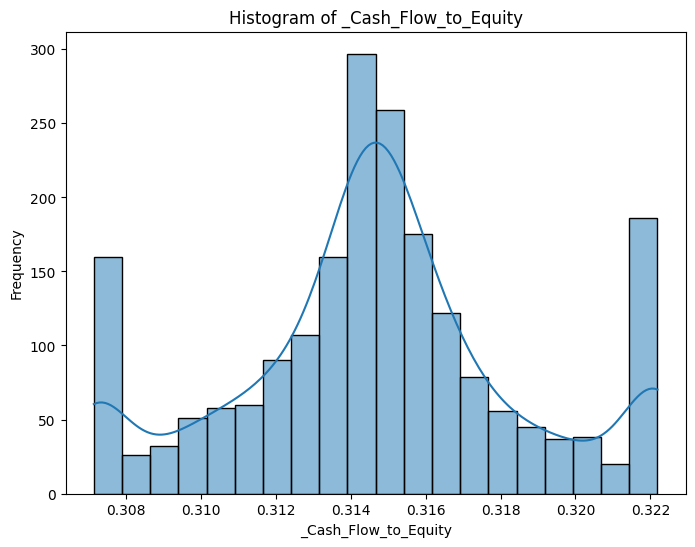

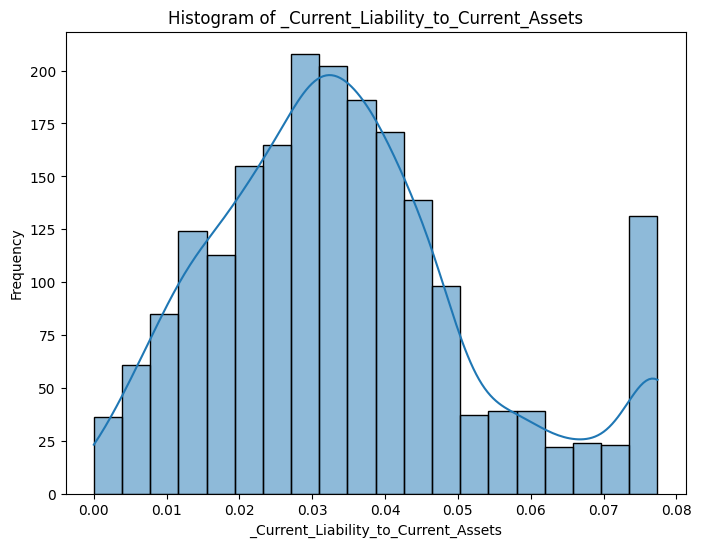

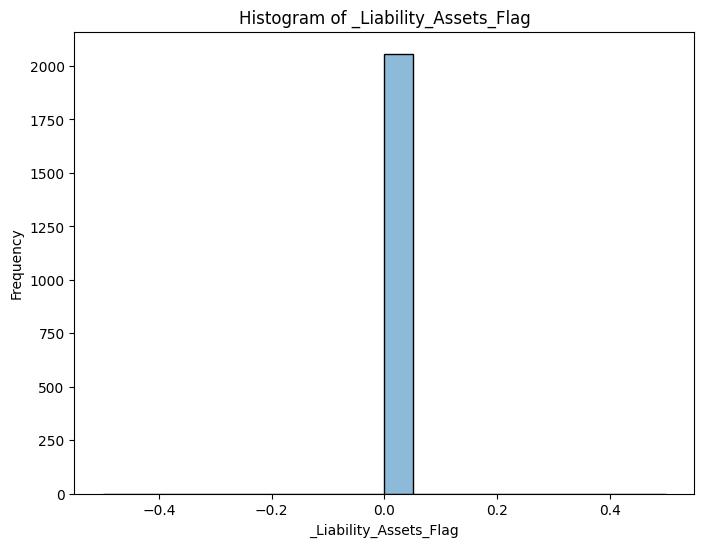

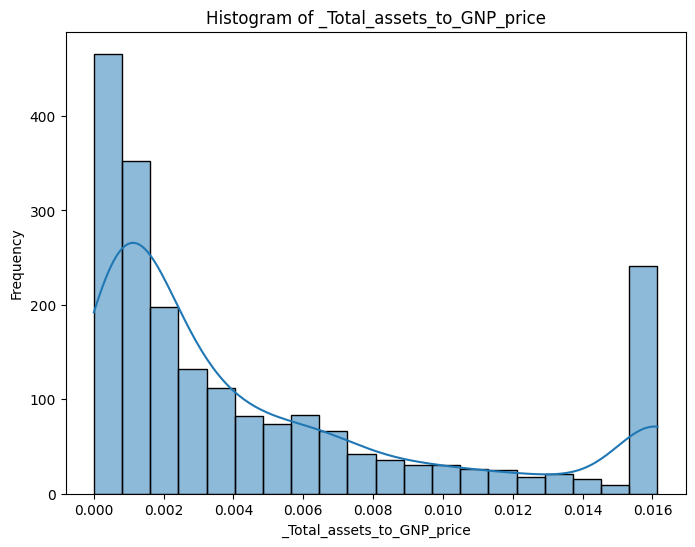

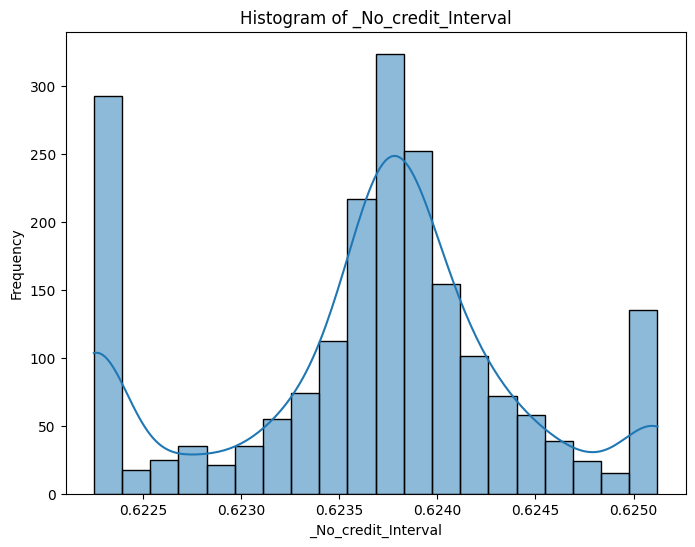

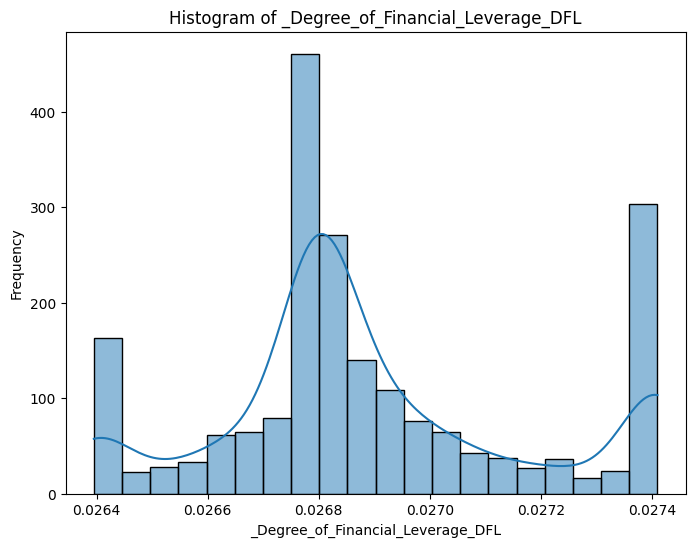

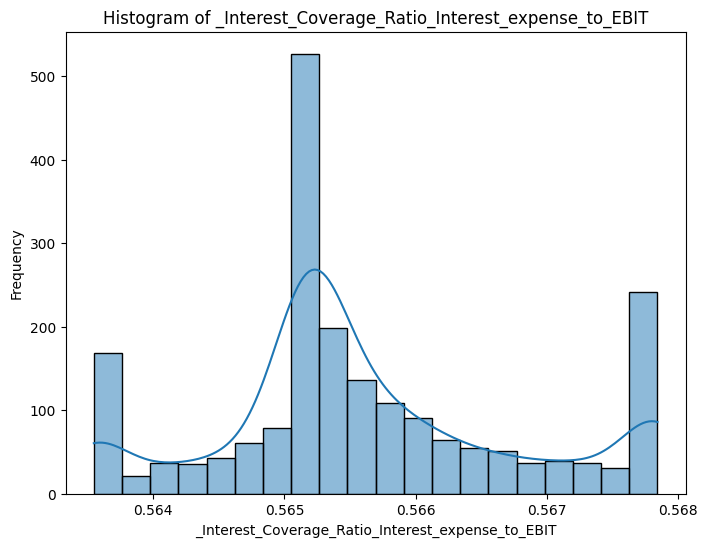

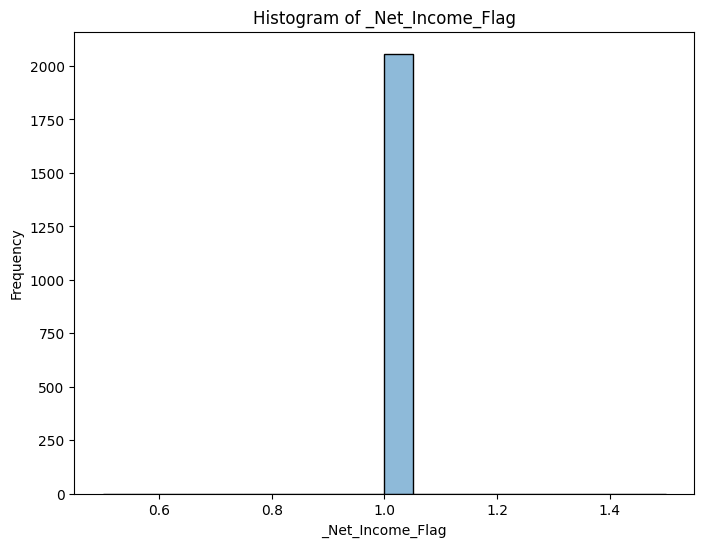

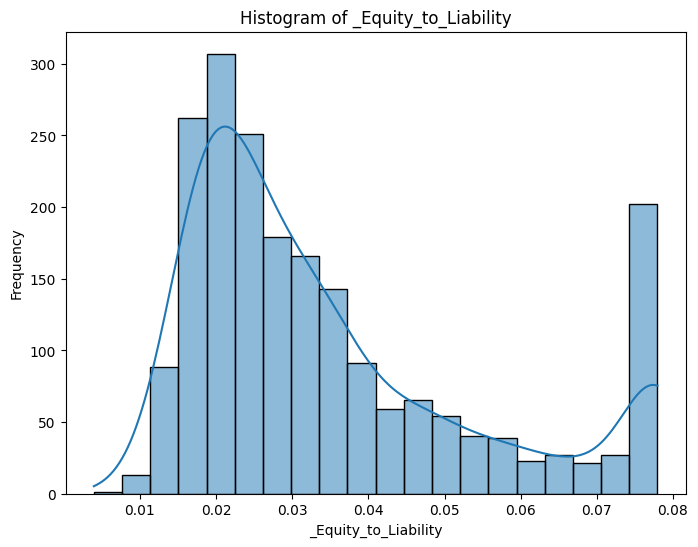

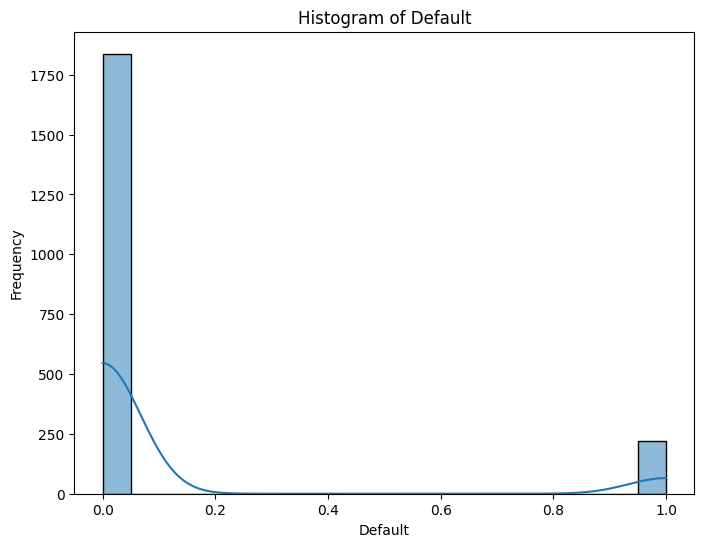

In [27]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numeric columns
numeric_columns = default.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms for numeric variables
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=default, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [44]:
# Drop 'Co_Code' and 'Co_Name' columns
default.drop(['Co_Code', 'Co_Name'], axis=1, inplace=True)


In [45]:
# Calculate correlation coefficients
correlation = default.corr()['Default'].sort_values(ascending=False)

# Select top correlated features (excluding the target variable itself)
top_correlated_features = correlation[1:6] 
# Select top 5 correlated features
print("Top correlated features with Default:")
print(top_correlated_features)


Top correlated features with Default:
_Total_debt_to_Total_net_worth            0.341323
_Current_Liability_to_Current_Assets      0.307068
_Total_expense_to_Assets                  0.184206
_Long_term_Liability_to_Current_Assets    0.132086
_Fixed_Assets_Turnover_Frequency          0.123346
Name: Default, dtype: float64


In [46]:
default.head()

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
0             8.820000e+09                            0.000000e+00   
1             9.380000e+09                            3.875000e+09   
2             3.800000e+09                            8.150000e+08   
3             6.440000e+09                            0.000000e+00   
4             3.680000e+09                            0.000000e+00   

   _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
0         0.462045                              0.000352     0.001417   
1         0.460116                              0.000716     0.000000   
2         0.449893                              0.000496     0.000000   
3         0.462731                              0.000592     0.009313   
4         0.463117                              0.000782     0.400243   

   _Cash_Flow_Per_Share  _Per_Share_Net_profit_before_tax_Yuan_  \
0              0.322558                                0.194472   
1              0.315520                                0.161633   
2              0.301182                                0.172554   
3              0.319834                                0.174738   
4              0.325104                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  _Operating_Profit_Growth_Rate  \
0                                  0.022074                       0.848021   
1                                  0.021918                       0.847763   
2                                  0.022186                       0.848196   
3                                  0.022293                       0.848326   
4                                  0.022072                       0.847987   

   _Continuous_Net_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                            0.217590  ...              0.310901   
1                            0.217506  ...              0.314572   
2                            0.217573  ...              0.314777   
3                            0.217662  ...              0.316974   
4                            0.217589  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                     0.0   
1                              0.041653                     0.0   
2                              0.033560                     0.0   
3                              0.016527                     0.0   
4                              0.034497                     0.0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.016143             0.622251   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026395   
2                           0.027276   
3                           0.026988   
4                           0.027410   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744               1.0   
1                                           0.563546               1.0   
2                                           0.566744               1.0   
3                                           0.565950               1.0   
4                                           0.567177               1.0   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 56 columns]

In [47]:
# Select top correlated features (excluding the target variable itself)
top_correlated_features = correlation[1:11]  # Select top 10 correlated features
print("Top correlated features with Default:")
print(top_correlated_features)


Top correlated features with Default:
_Total_debt_to_Total_net_worth            0.341323
_Current_Liability_to_Current_Assets      0.307068
_Total_expense_to_Assets                  0.184206
_Long_term_Liability_to_Current_Assets    0.132086
_Fixed_Assets_Turnover_Frequency          0.123346
_Average_Collection_Days                  0.117762
_Fixed_Assets_to_Assets                   0.086401
_Allocation_rate_per_person               0.080399
_Total_assets_to_GNP_price                0.068139
_Research_and_development_expense_rate    0.063541
Name: Default, dtype: float64


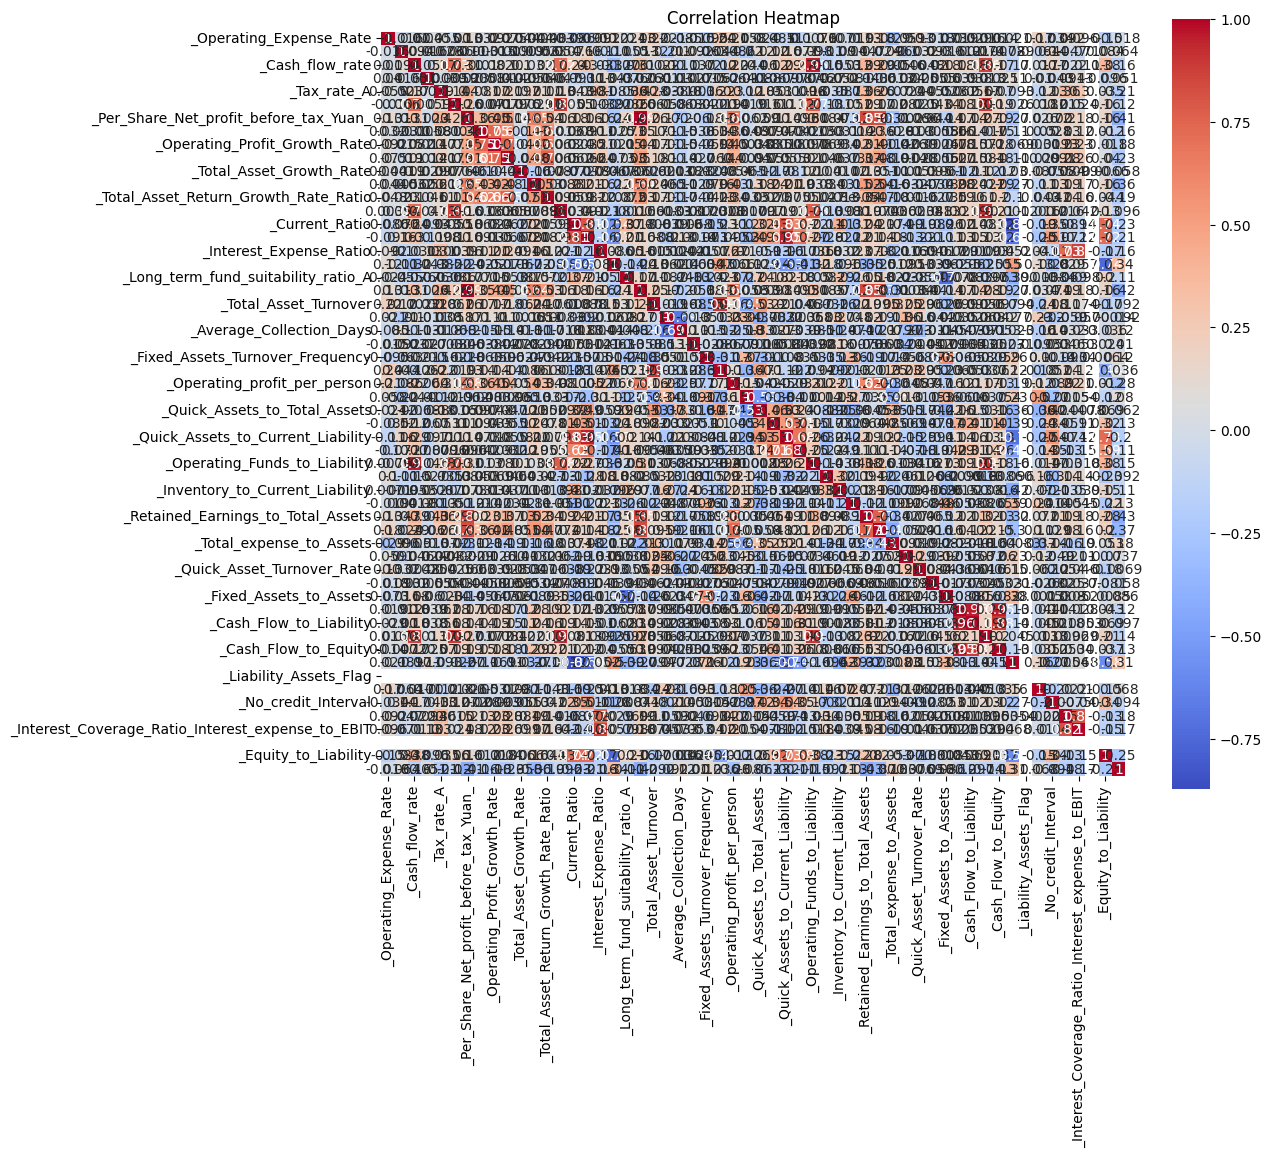

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix
correlation_matrix = default_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


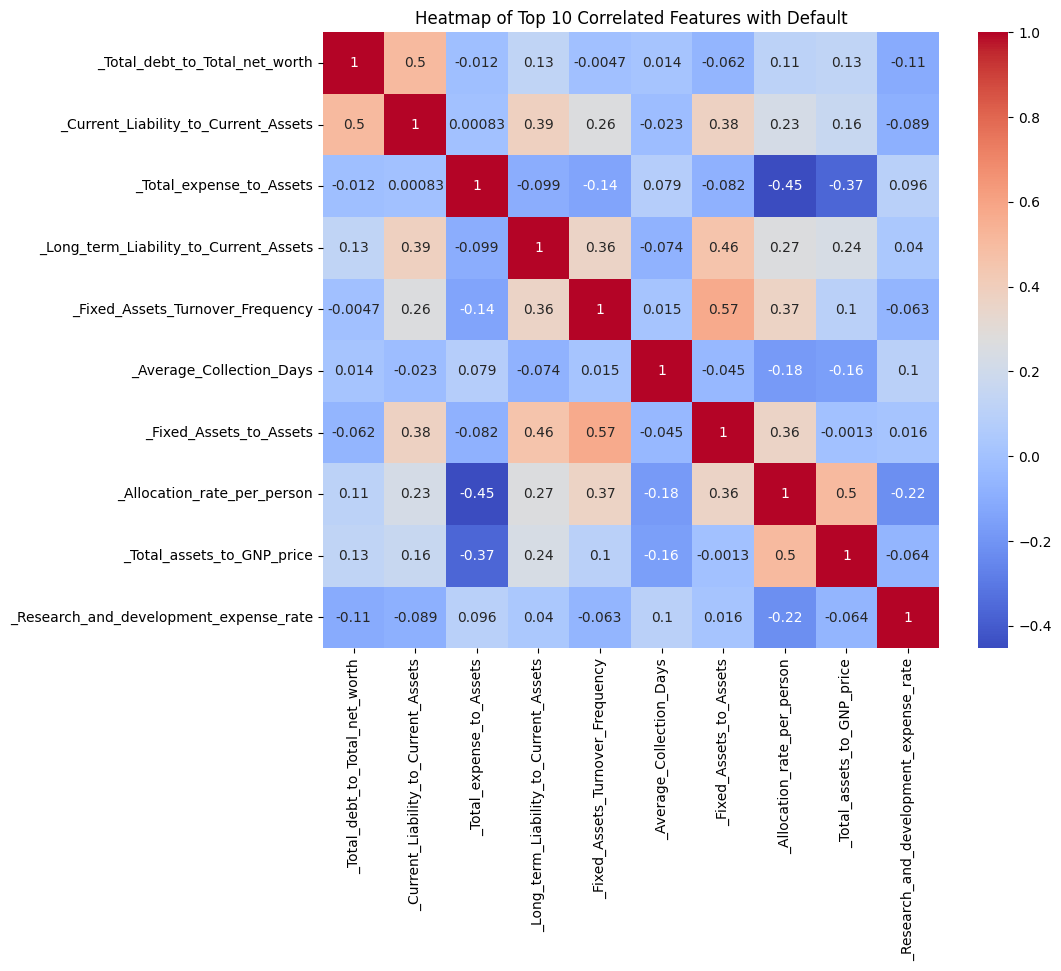

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top correlated features (excluding the target variable itself)
top_correlated_features = correlation[1:11]

# Get the corresponding subset of the dataframe
top_correlated_df = default_numeric[top_correlated_features.index]

# Calculate the correlation matrix
correlation_matrix = top_correlated_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Top 10 Correlated Features with Default')
plt.show()


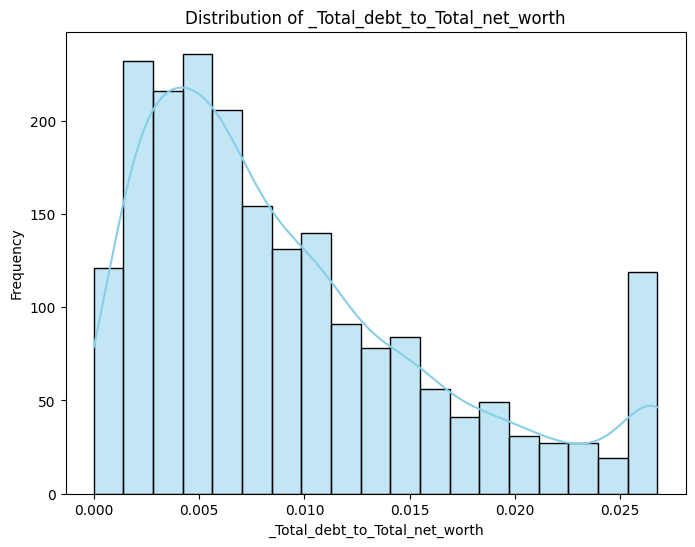

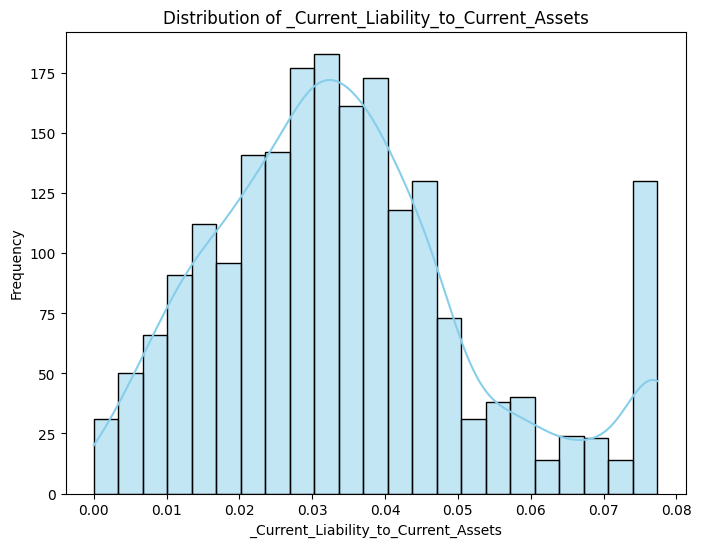

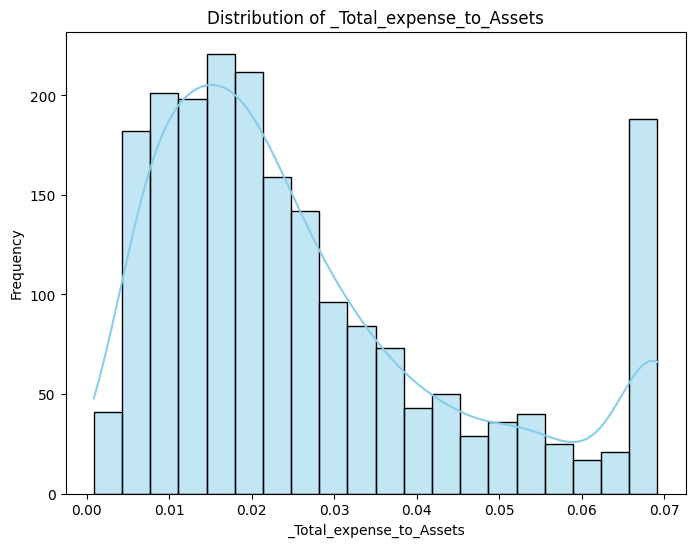

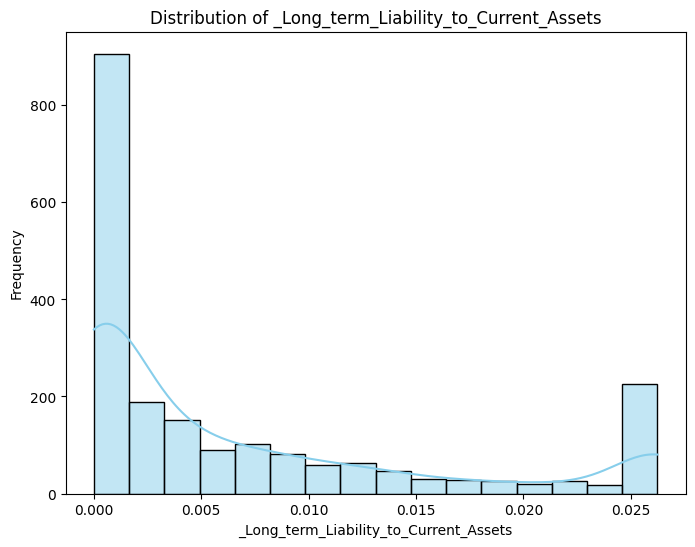

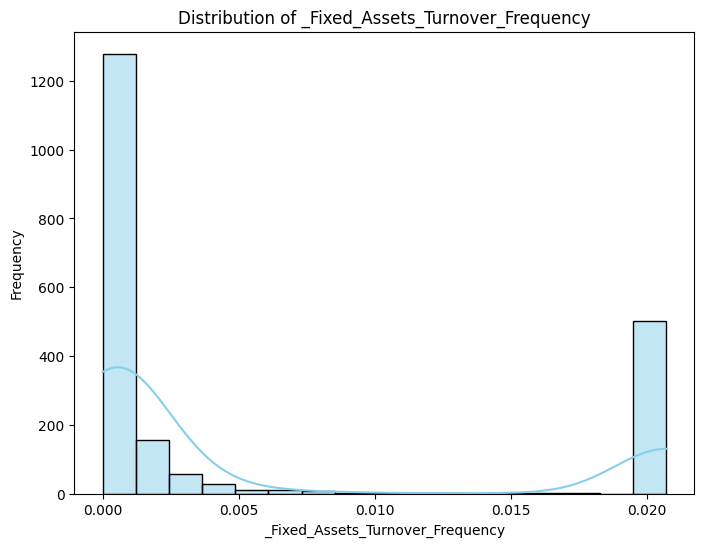

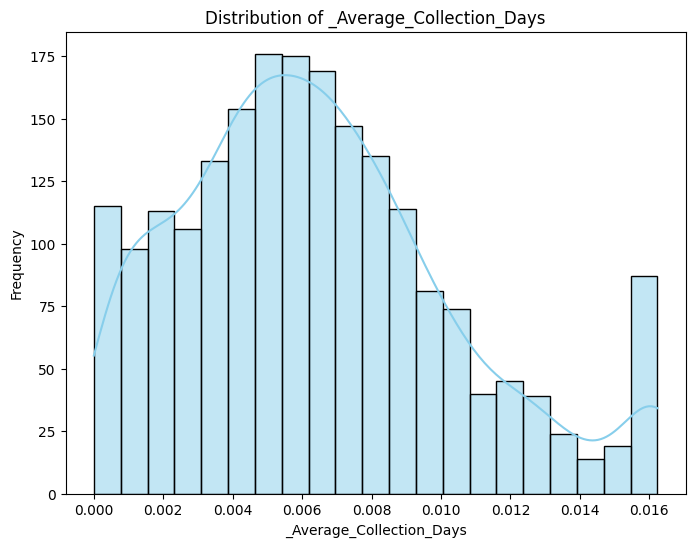

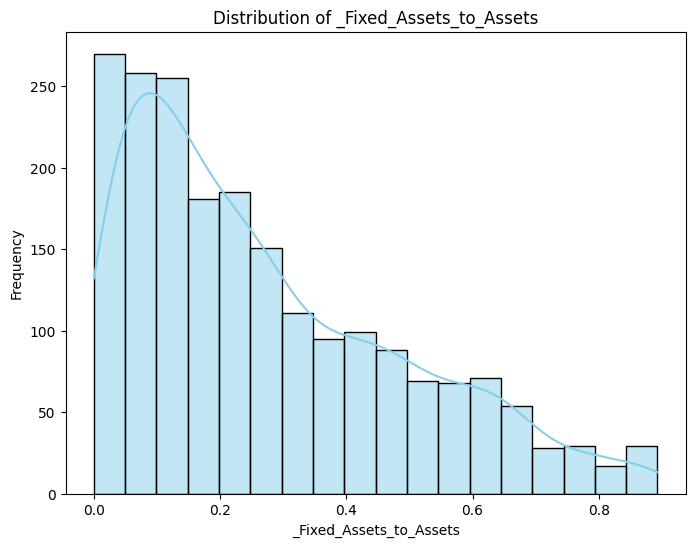

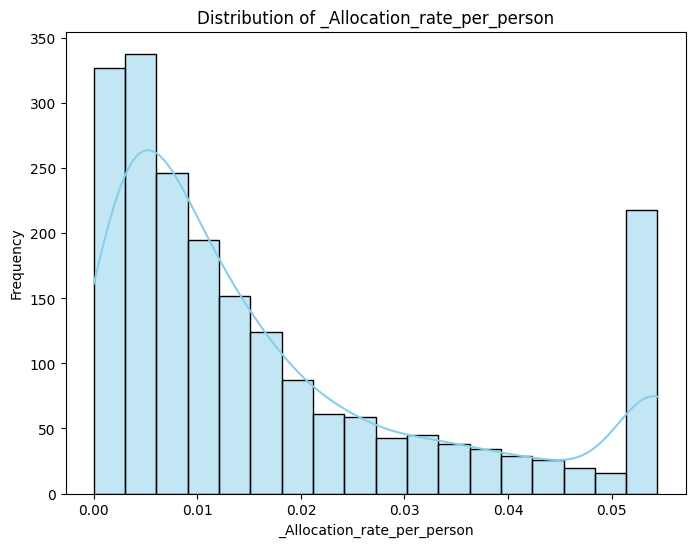

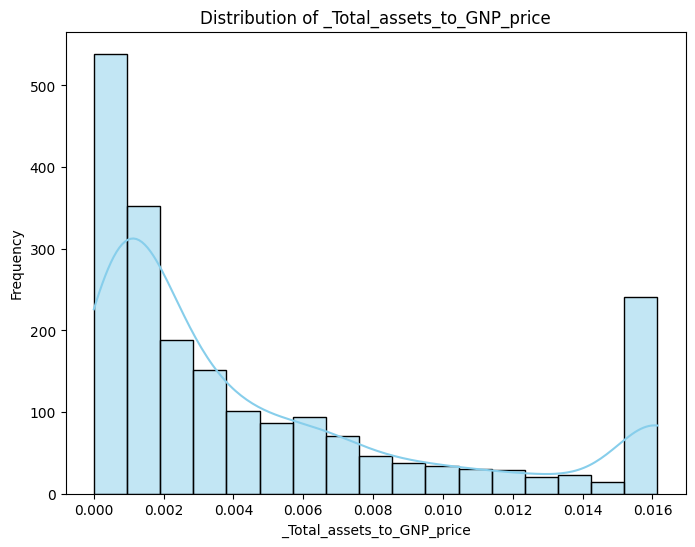

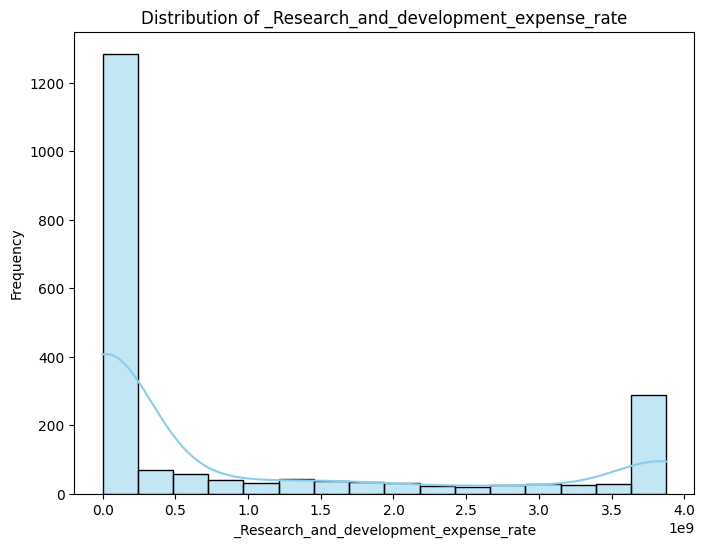

In [51]:
# Univariate Analysis
for feature in top_correlated_features.index:
    plt.figure(figsize=(8, 6))
    sns.histplot(default_numeric[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()



/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


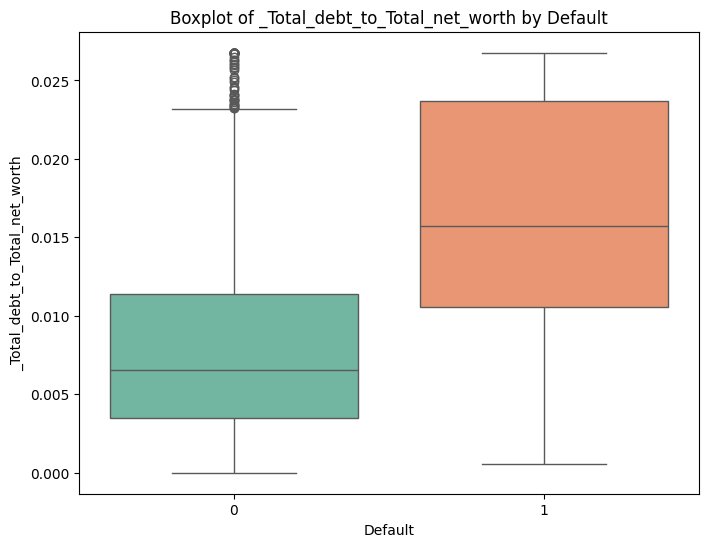

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


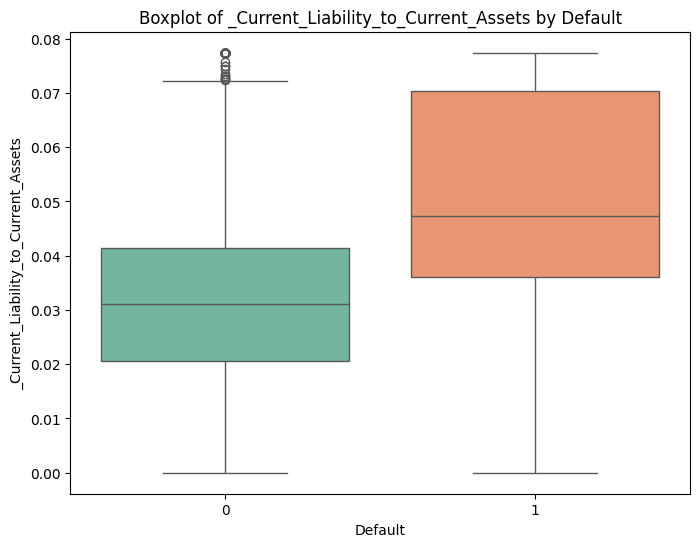

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


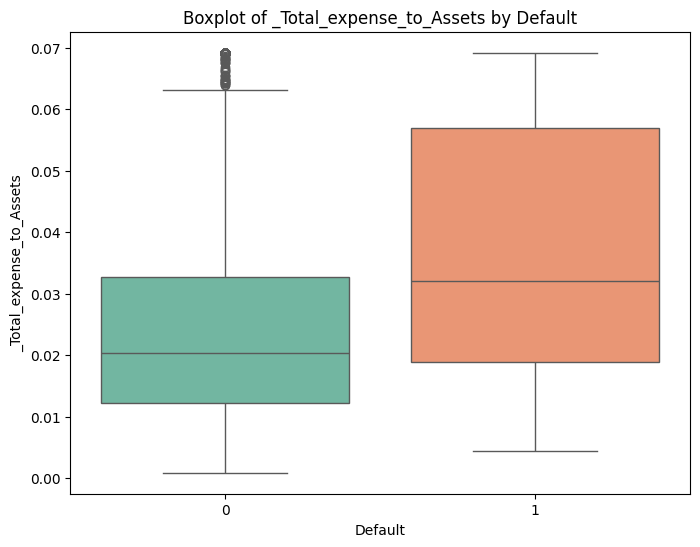

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


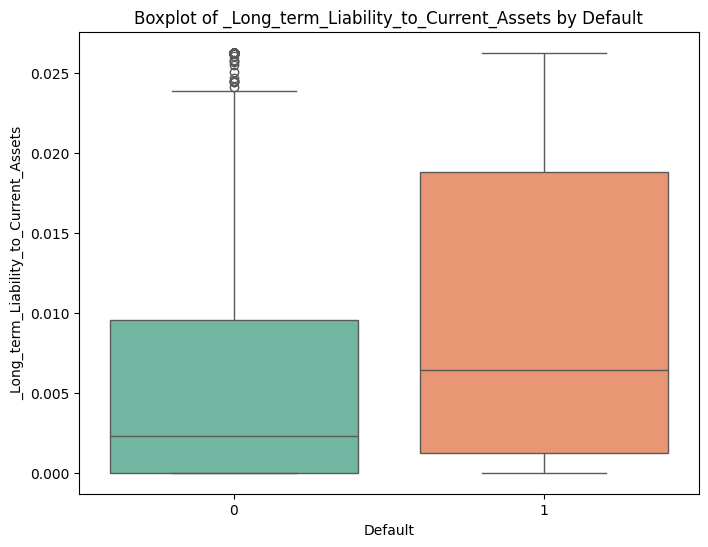

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


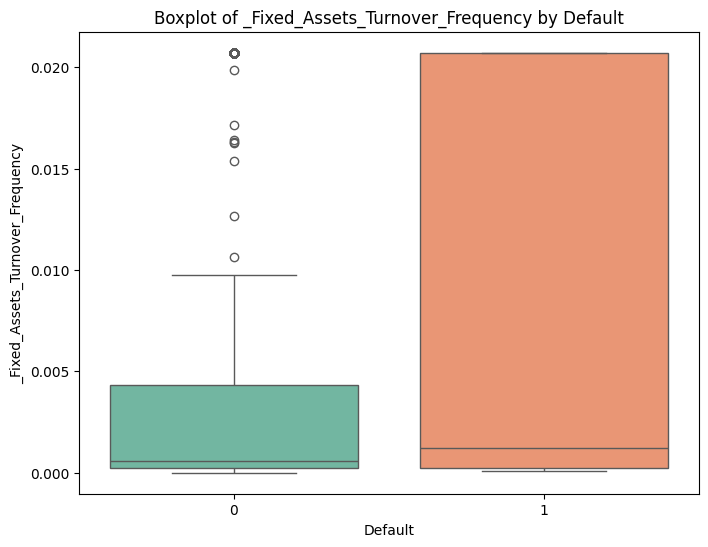

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


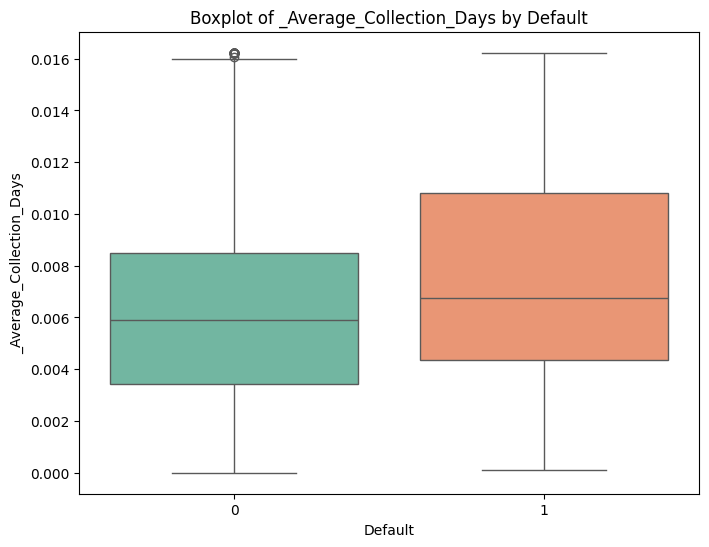

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


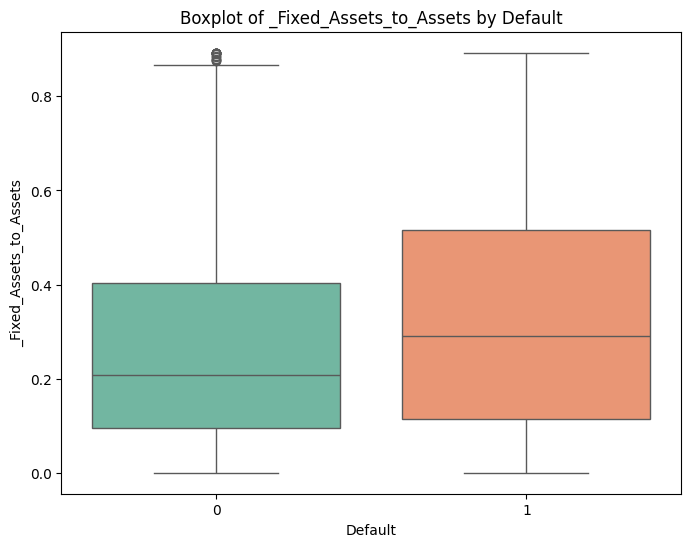

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


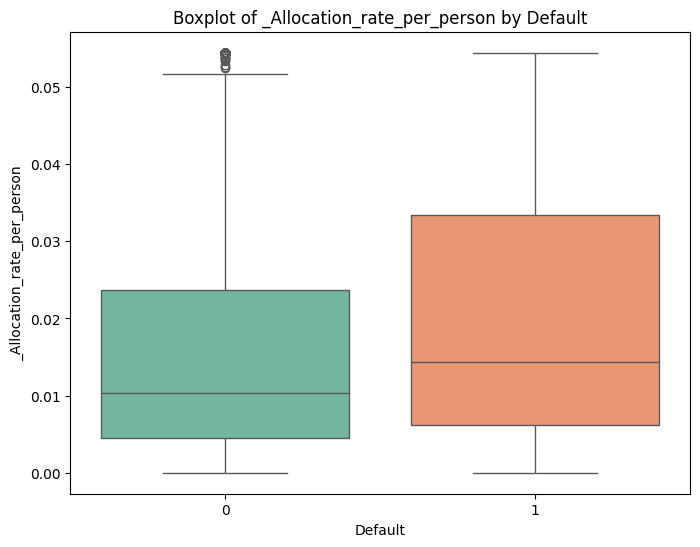

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


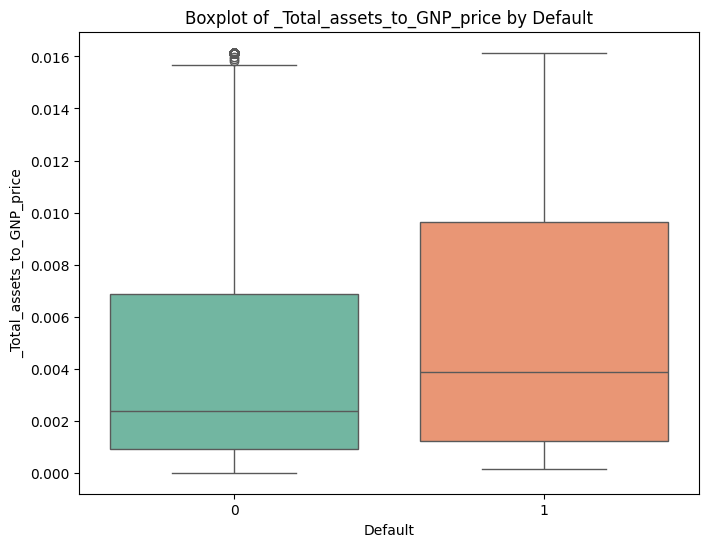

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82247/3345475858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')


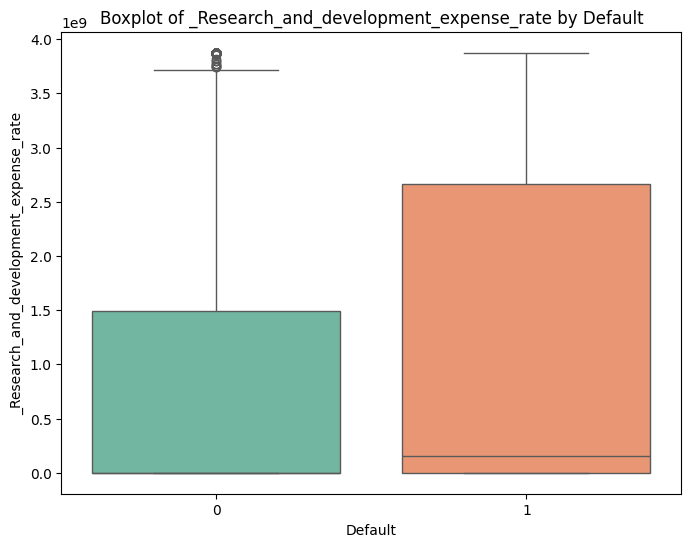

In [52]:
# Bivariate Analysis (with respect to the 'Default' variable)
for feature in top_correlated_features.index:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Default', y=feature, data=default_numeric, palette='Set2')
    plt.title(f'Boxplot of {feature} by Default')
    plt.xlabel('Default')
    plt.ylabel(feature)
    plt.show()


In [53]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = default[top_correlated_features.index]
y = default['Default']

# Split the data into training and testing sets (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1378, 10)
Shape of X_test: (680, 10)
Shape of y_train: (1378,)
Shape of y_test: (680,)


In [54]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc

# Add constant to the features
X_train = sm.add_constant(X_train)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()

# Predict probabilities on train set
y_train_prob = logit_result.predict(X_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Find the optimal threshold
optimal_idx_train = np.argmax(tpr_train - fpr_train)
optimal_threshold_train = thresholds_train[optimal_idx_train]

# Print the optimal threshold
print("Optimal threshold on train set:", optimal_threshold_train)


Optimization terminated successfully.
         Current function value: 0.240823
         Iterations 8
Optimal threshold on train set: 0.08762722309662127


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Add constant to the features of the test dataset
X_test = sm.add_constant(X_test)

# Predict probabilities on the test set
y_test_prob = logit_result.predict(X_test)

# Classify predictions based on the optimal threshold
y_test_pred = (y_test_prob >= optimal_threshold_train).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Print performance metrics
print("Performance Metrics on Test Dataset:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)


Performance Metrics on Test Dataset:
Accuracy: 0.7720588235294118
Precision: 0.2777777777777778
Recall: 0.8208955223880597
F1-score: 0.41509433962264153
ROC AUC: 0.8657446860315064


In [56]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       613
           1       0.28      0.82      0.42        67

    accuracy                           0.77       680
   macro avg       0.63      0.79      0.64       680
weighted avg       0.91      0.77      0.81       680



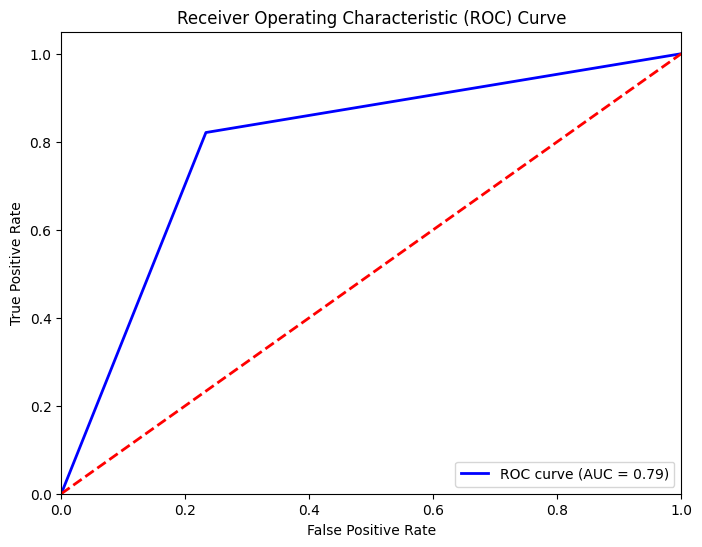

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9176470588235294
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       613
           1       0.74      0.25      0.38        67

    accuracy                           0.92       680
   macro avg       0.83      0.62      0.67       680
weighted avg       0.91      0.92      0.90       680



AUC Score: 0.8794283070779869


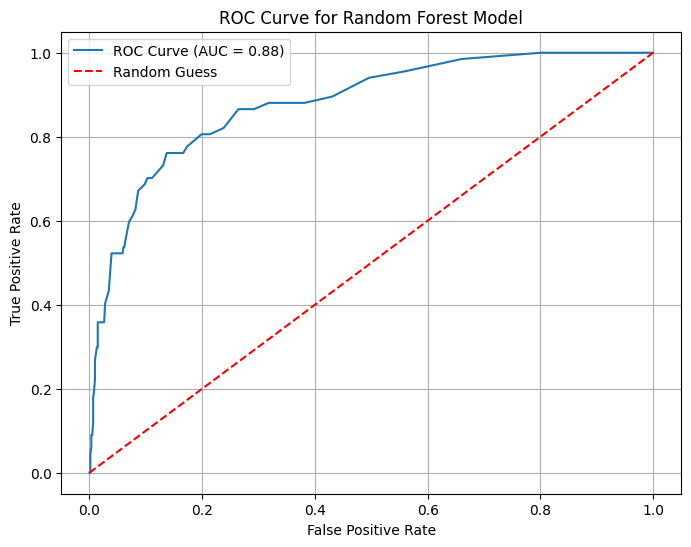

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda_model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix

# Predict the target variable on the test dataset
y_pred_lda = lda_model.predict(X_test)

# Generate classification report
print("Classification Report for LDA Model:")
print(classification_report(y_test, y_pred_lda))

# Generate confusion matrix
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("Confusion Matrix for LDA Model:")
print(conf_matrix_lda)




Classification Report for LDA Model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       613
           1       0.60      0.37      0.46        67

    accuracy                           0.91       680
   macro avg       0.76      0.67      0.71       680
weighted avg       0.90      0.91      0.90       680

Confusion Matrix for LDA Model:
[[596  17]
 [ 42  25]]


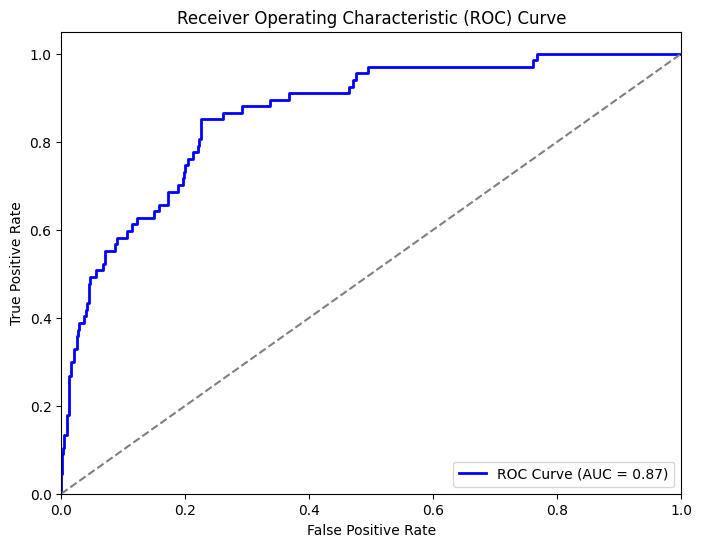

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of the positive class (class 1)
y_prob_lda = lda_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lda)

# Calculate the Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_prob_lda)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
